# MySQL Cheat-Sheet

[https://www.notion.so/bardadon/MySQL-Cheat-Sheet-Basics-c6d124b2ecc140739562711e59595bcd](https://www.notion.so/MySQL-Cheat-Sheet-Basics-c6d124b2ecc140739562711e59595bcd)

Important Note:

Any subject that is not present in this Cheat Sheet means that the
syntax is the same as MySQL. I only add subjects here that are unique to
postgres(at least thats the intent)

You wont find here: CTE, Case, LIKE, ANY, EXISTS, IN and so on. Because
they are the same as in MySQL.

# \#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#

# Cheatsheet

# \#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#

# Installing Postgres

``` code
apt-get update && apt-get install -y lsb-release && apt-get clean all &&\
    
# create a file named /etc/apt/sources.list.d/pgdg.list. This file contains PostgreSQL’s official repository’s address specific to your Ubuntu server version.
sh -c 'echo "deb http://apt.postgresql.org/pub/repos/apt $(lsb_release -cs)-pgdg main" > /etc/apt/sources.list.d/pgdg.list' &&\

# add the PostgreSQL GPG key to your package manager. APT will use this key to verify the authenticity of the packages in the repository. 
wget --quiet -O - https://www.postgresql.org/media/keys/ACCC4CF8.asc | apt-key add - &&\ 

# update the package lists, so that apt knows where to find the official PostgreSQL packages. 
apt update -y &&\

# Install PostgreSQL
apt install -y postgresql postgresql-contrib postgresql-client &&\
apt-get -y install systemctl
```

# Postgres CLI Server Commands

### Start the Postgres server:

In [ ]:
su - postgres -c '/usr/lib/postgresql/15/bin/initdb -D /var/lib/postgresql/data; /usr/lib/postgresql/15/bin/pg_ctl -D /var/lib/postgresql/data start';


OR


cd /usr/lib/postgresql/15/bin;
su postgres;
initdb;
pg_ctl start;

# (Load a file if needed)
psql postgres -f /tmp/create_tables.sql;

psql;

Both of these are the same:

Explanation:

initdb - Used to initialize a new PostgreSQL database cluster.(it
creates the files and configurations necessary)

pg_ctl - Used to start, stop, restart the server.

``` code
This command is used to initialize a PostgreSQL database cluster and start the PostgreSQL server. The su command is used to switch to the postgres user, and the -c option is used to specify a command to run as the postgres user. The command being run is initdb && pg_ctl start, which initializes the database cluster and starts the PostgreSQL server.

initdb is a utility program that is used to initialize a new PostgreSQL database cluster. It creates the necessary files and directories, and sets up the initial configuration.

pg_ctl is another utility program that is used to manage the PostgreSQL server. It can be used to start, stop, or restart the server, among other things. In this case, the start option is used to start the server.

This command is typically used when installing and setting up PostgreSQL for the first time. It initializes the database cluster and starts the server, allowing you to connect to the database and begin using it.
```

To run these commands to start postgres WITHOUT ANY PRINT MESSAGES, we
can just output the results into /dev/null like this:

``` code
su - postgres -c '/usr/lib/postgresql/15/bin/initdb -D /var/lib/postgresql/data --auth-local trust --auth-host trust > /dev/null; /usr/lib/postgresql/15/bin/pg_ctl -D /var/lib/postgresql/data start > /dev/null; psql postgres -f /usercode/tmp/create_tables.sql > /dev/null'
```





# Metadata Commands

## Shell Commands

| **Command**                                                                                  | **Description**                                                     | **Additional Information**                                                                        |
|----------------------------------------------------------------------------------------------|---------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|
| <span class="mark highlight-red">**psql -d database -U user -W**</span>                      | Connects to a database under a specific user                        | -d: used to state the database name -U:used to state the database user                            |
| <span class="mark highlight-red">**psql -h host -d database -U user -W**</span>              | Connect to a database that resides on another host                  | -h: used to state the host -d: used to state the database name -U:used to state the database user |
| **<span class="mark highlight-red">psql -U user -h host “dbname=db sslmode=require”</span>** | Use SSL mode for the connection                                     | -h: used to state the host -U:used to state the database user                                     |
| <span class="mark highlight-red">**\\c dbname**</span>                                       | Switch connection to a new database                                 |                                                                                                   |
| <span class="mark highlight-red">**\\l**</span>                                              | List available databases                                            |                                                                                                   |
| <span class="mark highlight-red">**\\dt**</span>                                             | List available tables                                               |                                                                                                   |
| <span class="mark highlight-red">**\\d table_name**</span>                                   | Describe a table such as a column, type, modifiers of columns, etc. | Use `/d+ table_name` to get more information                                                      |
| <span class="mark highlight-red">**\\dn**</span>                                             | List all schemes of the currently connected database                |                                                                                                   |
| <span class="mark highlight-red">**\\df**</span>                                             | List available functions in the current database                    |                                                                                                   |
| <span class="mark highlight-red">**\\dv**</span>                                             | List available views in the current database                        |                                                                                                   |
| <span class="mark highlight-red">**\\du**</span>                                             | List all users and their assign roles                               |                                                                                                   |
| <span class="mark highlight-red">**SELECT version();**</span>                                | Retrieve the current version of PostgreSQL server                   |                                                                                                   |
| <span class="mark highlight-red">**\\g**</span>                                              | Execute the last command again                                      |                                                                                                   |
| <span class="mark highlight-red">**\\s**</span>                                              | Display command history                                             |                                                                                                   |
| <span class="mark highlight-red">**\\s filename**</span>                                     | Save the command history to a file                                  |                                                                                                   |
| <span class="mark highlight-red">**\\i filename**</span>                                     | Execute psql commands from a file                                   |                                                                                                   |
| <span class="mark highlight-red">**\\?**</span>                                              | Know all available psql commands                                    |                                                                                                   |
| <span class="mark highlight-red">**\\h**</span>                                              | Get help                                                            | Eg:to get detailed information on ALTER TABLE statement use the \\h ALTER TABLE                   |
| <span class="mark highlight-red">**\\e**</span>                                              | Edit command in your own editor                                     |                                                                                                   |
| <span class="mark highlight-red">**\\ef function_name**</span>                               | Edit a function                                                     |                                                                                                   |
| <span class="mark highlight-red">**\\a**</span>                                              | Switch from aligned to non-aligned column output                    |                                                                                                   |
| <span class="mark highlight-red">**\\H**</span>                                              | Switch the output to HTML format                                    |                                                                                                   |
| <span class="mark highlight-red">**\\q**</span>                                              | Exit psql shell                                                     |                                                                                                   |
| <span class="mark highlight-red">**\\timing**</span>                                         | Turn on timing to measure execution time                            | Use it again to turn it off                                                                       |
|                                                                                              |                                                                     |                                                                                                   |
|                                                                                              |                                                                     |                                                                                                   |


## Postgres Metadata

### tables & columns

In [ ]:
pg_tables # Info about tables

select column_name, data_type, ordinal_position
from information_schema.columns
where table_schema = 'public' and table_name = 'emp';

### Index

In [ ]:
select a.tablename,a.indexname,b.column_name
from pg_catalog.pg_indexes a, information_schema.columns b
where a.schemaname = 'public' and a.tablename = b.table_name;

### Constraints(i.e unique, not null, primary key…)

In [ ]:
select a.table_name,
a.constraint_name,
b.column_name,
a.constraint_type
from information_schema.table_constraints a,
information_schema.key_column_usage b
where a.table_name = 'emp'
and a.table_schema = 'public'
and a.table_name = b.table_name
and a.table_schema = b.table_schema
and a.constraint_name = b.constraint_name;


# **PostgreSQL Administration**


## Create Database


-   Syntax:

``` code
CREATE DATABASE database_name
WITH
   [OWNER =  role_name]
   [TEMPLATE = template]
   [ENCODING = encoding]
   [LC_COLLATE = collate]
   [LC_CTYPE = ctype]
   [TABLESPACE = tablespace_name]
   [ALLOW_CONNECTIONS = true | false]
   [CONNECTION LIMIT = max_concurrent_connection]
   [IS_TEMPLATE = true | false ]
```

<span style="border-bottom:0.05em solid">**Explanation about the
options**</span>

**OWNER**

-   Set the owner of the database

<!-- -->

-   The default owner is the role you used to create the database

**TEMPLATE**

Specify the template database from which the new database is created. By
default, PostgreSQL uses the `template1` database as the template
database if you don’t explicitly specify the template database.

**ENCODING**

Determine the character set encoding in the new database.

**LC_COLLATE**

Specify the collation order (`LC_COLLATE`) that the new database will
use. This parameter affects the sort order of string in the queries that
contain the
[`ORDER BY`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-order-by/)
clause. It defaults to the `LC_COLLATE` of the template database.

**LC_CTYPE**

Specify the character classification that the new database will use. It
affects the classification of character e.g., lower, upper, and digit.
It defaults to the `LC_CTYPE` of the template database

**TABLESPACE**

Specify the
[tablespace](https://www.postgresqltutorial.com/postgresql-create-tablespace/)
name for the new database. The default is the tablespace of the template
database.

**CONNECTION LIMIT**

Specify the maximum concurrent connections to the new database. The
default is -1 i.e., unlimited. This parameter is useful in the shared
hosting environments where you can configure the maximum concurrent
connections for a particular database.

**ALLOW_CONNECTIONS**

The `allow_connections` parameter is a boolean value. If it is `false`,
you cannot connect to the database.

**TABLESPACE**

Specify the
[tablespace](https://www.postgresqltutorial.com/postgresql-create-tablespace/)
that the new database will use. It defaults to the tablespace of the
template database.

**IS_TEMPLATE**

If the `IS_TEMPLATE` is true, any user with the `CREATEDB` privilege can
clone it. If false, only superusers or the database owner can clone it.

-   Only roles with `CREATEDB` permission can create a new database.

<span style="border-bottom:0.05em solid">**Examples**</span>

``` code
-- Example #1 - Simple create database 
CREATE DATABASE sales;

-- Example #2 - encode with UTF8, set the owner of the db to be the HR role
CREATE DATABASE hr 
WITH 
   ENCODING = 'UTF8'
   OWNER = hr
   CONNECTION LIMIT = 100;
```

## Alter Database

### **Changing attributes of a database**

-   Syntax

``` code
ALTER DATABASE name WITH option;
```

The option can be:

-   `IS_TEMPLATE`

<!-- -->

-   `CONNECTION LIMIT`

<!-- -->

-   `ALLOW_CONNECTIONS`

### **Rename the database**

-   Syntax

``` code
ALTER DATABASE database_name
RENAME TO new_name;

-- Example
ALTER DATABASE testdb2 
RENAME TO testhrdb;
```

-   To Rename a database we need to follow these steps:
    1.  Disconnect from the database that you want to rename and connect
        to a different database.

    <!-- -->

    1.  Check and terminate all active connections to the database that
        you want to rename.

    <!-- -->

    1.  Use the
        [`ALTER DATABASE`](https://www.postgresqltutorial.com/postgresql-alter-database/)
        statement to rename the database to the new one.

<!-- -->

-   For example:

    ``` code
    drop database if exists test;
    create database test;
    ```

    ``` code
    -- Step .1 - Connect to postgres(by connecting to postgres you disconnect from the current database)
    db=# \connect postgres

    -- Step .2 - Check current connections to the DB
    SELECT  *
    FROM pg_stat_activity
    WHERE datname = 'test';

    -- Terminate all connections to 'test'
    SELECT
        pg_terminate_backend (pid)
    FROM
        pg_stat_activity
    WHERE
        datname = 'test';

    -- Step .3 - Rename the database
    alter database test
    rename to renamed_test;
    ```

### **Change the owner of the database**

-   Syntax

``` code
ALTER DATABASE database_name
OWNER TO new_owner | current_user | session_user;

-- Example
ALTER DATABASE testhrdb 
OWNER TO hr;
```

-   If the role does not exist, create it.

    ``` code
    CREATE ROLE hr
    LOGIN 
    CREATEDB
    PASSWORD 'securePa$$1';
    ```

### **Change the default tablespace of a database**

``` code
ALTER DATABASE database_name
SET TABLESPACE new_tablespace;

-- Example
ALTER DATABASE testhrdb
SET TABLESPACE hr_default;
```

-   If the tablespace does not exist, create it.

    ``` code
    CREATE TABLESPACE hr_default
    OWNER hr
    LOCATION 'C:\\sampledb\\hr';
    ```

### **Change session defaults for run-time configuration variables**

``` code
ALTER DATABASE database_name
SET configuration_parameter = value;

-- Example
ALTER DATABASE testhrdb 
SET escape_string_warning = off;
```

## Drop Database

Same logic as renaming a database, before dropping it we need to make
sure there arent any active connections to the database

``` code
-- Step .1 - Connect to postgres(by connecting to postgres you disconnect from the current database)
db=# \connect postgres

-- Step .2 - Check current connections to the DB
SELECT  *
FROM pg_stat_activity
WHERE datname = 'test';

-- Terminate all connections to 'test'
SELECT
    pg_terminate_backend (pid)
FROM
    pg_stat_activity
WHERE
    datname = 'test';

-- Step .3 - Drop the database
drop database if exists test;
```

## COPY Database

<https://www.postgresqltutorial.com/postgresql-administration/postgresql-copy-database/>

## **PostgreSQL Schema**

In Postgres, a schema is an object within a database, that contains,
views, index, data types, functions, procedures and so on.

We can access an object in a schema, like this:
`schema_name.object_name`

So to access a table staff in a schema called public we do this:
`public.staff`

Schemas allow you to organize database objects e.g., tables into logical
groups to make them more manageable.

Schemas enable multiple users to use one database without interfering
with each other.

### The public schema

Postgres automatically creates a schema called `public` for every
database. **Every object we create without specifying the schema goes to
the public schema**

### **The schema search path**

When we actually work on tables, in practice we don't specify the schema
name. When we don't specify the schema name, Postgres searches for the
table by using the **schema search path.**

which is a list of schemas to look in.

**PostgreSQL will access the first matching table in the schema search
path. If there is no match, it will return an error, even the name
exists in another schema in the database.**

In other words, when we say the current schema, it essentially means the
first schema that postgres found in the search path.

Check the current schema with this command:

``` code
SELECT current_schema();
```

``` code
 current_schema
----------------
public
(1 row)
```

Check the search path with this command:

``` code
SHOW search_path;
```

``` code
 search_path
-----------------
"$user", public
(1 row)
```

<span style="border-bottom:0.05em solid">**Translation** </span>- When
we issue a query, postgres will first search for a schema with the same
name as my user name that i used to log in with, If i used the username
`“data_scientist”` to log in and try to query the table `“rates”`,
postgres will first look for a table called `“rates”` in a schema called
`“data_scientist”`.

If it cant find a schema called `data_scientist`, postgres will for the
table name in the `public `schema.

### Create schema

``` code
CREATE SCHEMA sales;
```

-   After creating a schema, adjust the search space to include that
    schema:

``` code
SET search_path TO sales, public;
```

-   Now if ill create a table called `staff` without mentioning the
    schema name, it will automatically go to the `sales` schema:

``` code
CREATE TABLE staff(
    staff_id SERIAL PRIMARY KEY,
    first_name VARCHAR(45) NOT NULL,
    last_name VARCHAR(45) NOT NULL,
    email VARCHAR(100) NOT NULL UNIQUE
);
```

<span class="image"></span>

### **PostgreSQL schemas and privileges**

Users can only access objects in the schemas that they own. It means
they cannot access any objects in the schemas that do not belong to
them.

To allow users to access the objects in the schema that they do not own,
you must grant the `USAGE` privilege of the schema to the users:

-   Syntax:

``` code
GRANT USAGE ON SCHEMA schema_name 
TO role_name;
```

To allow users to create objects in the schema that they do not own, you
need to grant them the `CREATE` privilege of the schema to the users:

``` code
GRANT CREATE ON SCHEMA schema_name 
TO user_name;
```

Note that, by default, every user has the `CREATE` and `USAGE` on the
`public` schema.

### **ALTER SCHEMA**

## System Tables

System tables are built-in tables that hold useful metadata about
postgres.

-   `pg_catalog` - Store information objects in Postgres

    ``` code
    SELECT *
    FROM pg_catalog.pg_tables
    WHERE schemaname != 'pg_catalog' AND 
        schemaname != 'information_schema';
    ```

    <span class="image"></span>

<!-- -->

-   `pg_database` - Store information on all the databases

    ``` code
    SELECT datname FROM pg_database;

    datname
    -----------
     postgres
     template1
     template0
     dvdrental
    (4 rows)
    ```

<!-- -->

-   `pg_tables` - This is the most important table. it has information
    about all of the tables in postgres

    ``` code
    select *
    from pg_tables;
    ```

    <span class="image"></span>

<!-- -->

-   `pg_stat_activity` - Show all active connection

    ``` code
    SELECT  *
    FROM pg_stat_activity
    WHERE datname = 'db';
    ```

<!-- -->

-   `pg_roles` - Check all the roles

    ``` code
    select rolname
    from pg_roles;
    ```

    ``` code
    "pg_database_owner"
    "pg_read_all_data"
    "pg_write_all_data"
    "pg_monitor"
    "pg_read_all_settings"
    "pg_read_all_stats"
    "pg_stat_scan_tables"
    "pg_read_server_files"
    "pg_write_server_files"
    "pg_execute_server_program"
    "pg_signal_backend"
    "postgres"
    "hr_manager"
    "bar_is_king"
    ```

<!-- -->

-   `information_schema.columns` - Table about all the columns

    ``` code
    SELECT 
       table_name, 
       column_name, 
       data_type 
    FROM 
       information_schema.columns
    WHERE 
       table_name = 'city';
    ```

    <span class="image"></span>

## System Functions and queries

I made this name up, but ill put built-in functions that are used to get
metadata.

-   `pg_total_relation_size` - Total size of a table

    ``` code
    select pg_total_relation_size('actor');
    ```

<!-- -->

-   `pg_relation_size` - Get the size of a table

    ``` code
    select pg_relation_size('actor');
    ```

<!-- -->

-   `pg_size_pretty ` - Translate the output from bytes to kb

    ``` code
    SELECT
        pg_size_pretty (pg_relation_size('actor'));
    ```

<!-- -->

-   Use this to get a list of the most heavy tables:

    ``` code
    SELECT
        relname AS "relation",
        pg_size_pretty (
            pg_total_relation_size (C .oid)
        ) AS "total_size"
    FROM
        pg_class C
    LEFT JOIN pg_namespace N ON (N.oid = C .relnamespace)
    WHERE
        nspname NOT IN (
            'pg_catalog',
            'information_schema'
        )
    AND C .relkind <> 'i'
    AND nspname !~ '^pg_toast'
    ORDER BY
        pg_total_relation_size (C .oid) DESC
    LIMIT 5;
    ```

    <span class="image"></span>

<!-- -->

-   `pg_database_size` - Size of the whole database

    ``` code
    SELECT
        pg_size_pretty (
            pg_database_size ('dvdrental')
        );
    ```

    ``` code
    pg_size_pretty
    ----------------
     15 MB
    (1 row)
    ```

<!-- -->

-   Size of each database

    ``` code
    SELECT
        pg_database.datname,
        pg_size_pretty(pg_database_size(pg_database.datname)) AS size
        FROM pg_database;
    ```

    <span class="image"></span>

<!-- -->

-   Size of an index

    ``` code
    SELECT
        pg_size_pretty (pg_indexes_size('actor'));
    ```

    ``` code
     pg_size_pretty
    ----------------
     32 kB
    (1 row)
    ```

<!-- -->

-   Size of a tablespace

    ``` code
    SELECT
        pg_size_pretty (
            pg_tablespace_size ('pg_default')
        );
    ```

    ``` code
     pg_size_pretty
    ----------------
     43 MB
    (1 row)
    ```

<!-- -->

-   Size of a column

    ``` code
    select pg_column_size(5::smallint);
     pg_column_size
    ----------------
                  2
    (1 row)


    select pg_column_size(5::int);
     pg_column_size
    ----------------
                  4
    (1 row)


    select pg_column_size(5::bigint);
     pg_column_size
    ----------------
                  8
    (1 row)
    ```

    -   Get the owners of the schema in the a database

    ``` code
    SELECT * 
    FROM 
        pg_catalog.pg_namespace
    WHERE 
        nspacl is NULL AND
        nspname NOT LIKE 'pg_%'
    ORDER BY 
        nspname;
    ```

    <span class="image"></span>

    As we can see, the owner of finance is user with id 10, which his
    postgres

# Load Data

Load Data from the shell

The data is saved at: `C:\sampledb\dvdrental.tar`

Lets load it to Postgres using the cli shell.

-   First, launch the **psql** tool. press Enter to enter with the
    default values

<span class="image"></span>

-   Create database

``` code
postgres=# create database dvdrental;
```

-   Load the data using the pg_restore tool

``` code
pg_restore -U postgres -d dvdrental C:\sampledb\dvdrental.tar
```

Load the DVD Rental database using the pgAdmin

The following shows you step by step on how to use the pgAdmin tool to
restore the [sample
database](https://www.postgresqltutorial.com/postgresql-sample-database/)
from the database file:

First, launch the **pgAdmin** tool and [connect to the PostgreSQL
server](https://www.postgresqltutorial.com/postgresql-python/connect/).

Second, right click the **Databases** and select the **Create \>
Database…** menu option:

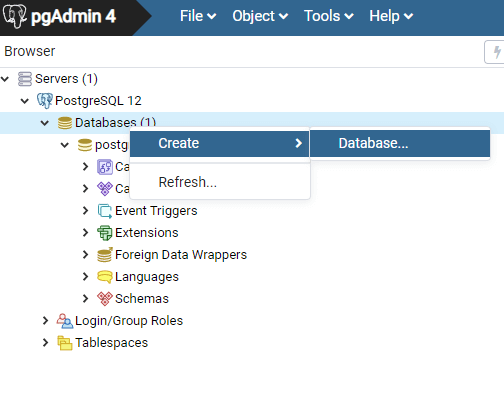

Third, enter the database name `dvdrental` and click the **Save**
button:

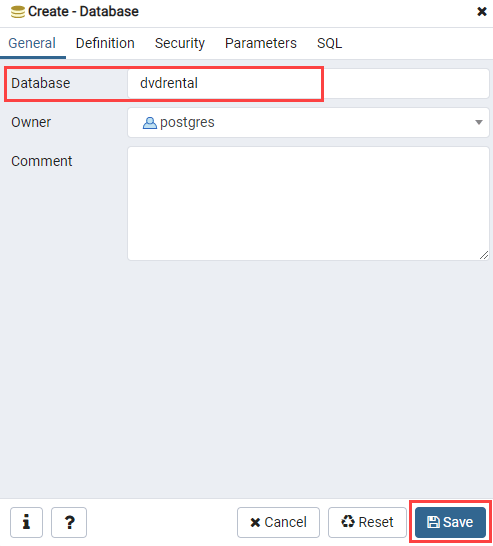

You’ll see the new empty database created under the Databases node:

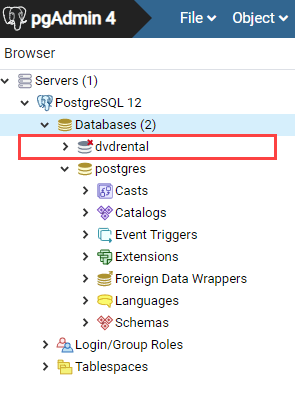

Fourth, right-click on the **dvdrental** database and choose
**Restore…** menu item to restore the database from the downloaded
database file:

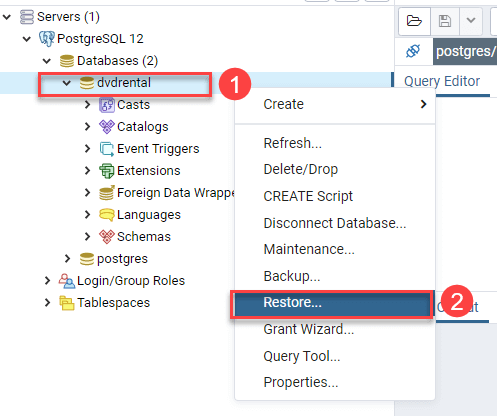

Fifth, enter the path to the sample database file e.g.,
**c:\\sampledb\\dvdrental.tar** and click the **Restore** button:

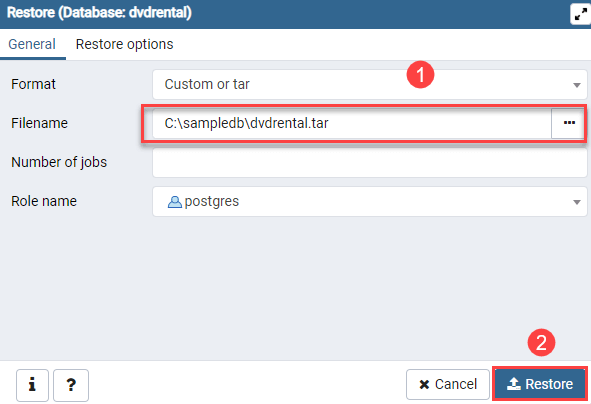

Sixth, the restoration process will complete in few seconds and shows
the following dialog once it completes:

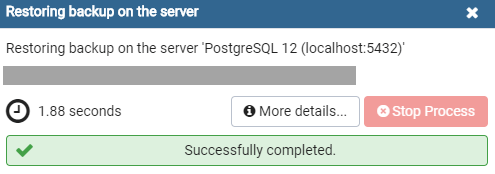

Finally, open the `dvdrental` database from object browser panel, you
will find tables in the `public` schema and other database objects as
shown in the following picture:

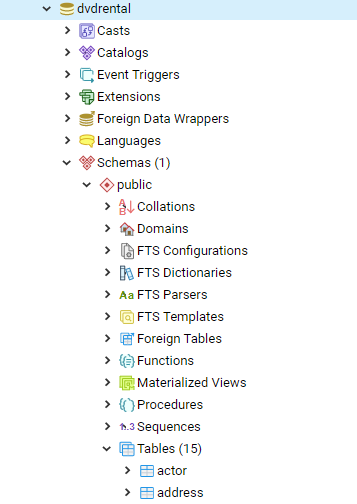

In this tutorial, you have learned how to load the `dvdrental` sample
database into the PostgreSQL database server for practicing PostgreSQL.

# CREATE

## Database

``` code
postgres=# CREATE DATABASE dvdrental;
```

## Table

-   syntax:

``` code
CREATE TABLE [IF NOT EXISTS] table_name (
   column1 datatype(length) column_contraint,
   column2 datatype(length) column_contraint,
   column3 datatype(length) column_contraint,
   table_constraints
);
```

<span style="border-bottom:0.05em solid">**Constraints**</span>

PostgreSQL includes the following column constraints:

-   [NOT
    NULL ](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-not-null-constraint/)–
    ensures that values in a column cannot be `NULL`.

<!-- -->

-   [UNIQUE](https://www.postgresqltutorial.com/postgresql-unique-constraint/)
    – ensures the values in a column unique across the rows within the
    same table.

``` code
# Method #1 - Making the email unique as a constraint
CREATE TABLE person (
    id SERIAL  PRIMARY KEY,
    first_name VARCHAR (50),
    last_name  VARCHAR (50),
    email      VARCHAR (50),
        UNIQUE(email)
);


# Methd #2 - Making the email unique as a data type constraint
CREATE TABLE person (
    id SERIAL PRIMARY KEY,
    first_name VARCHAR (50),
    last_name VARCHAR (50),
    email VARCHAR (50) UNIQUE
);
```

-   [PRIMARY
    KEY](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-primary-key/)
    – a primary key column uniquely identify rows in a table. A table
    can have one and only one primary key. The primary key constraint
    allows you to define the primary key of a table.

<!-- -->

-   [CHECK](https://www.postgresqltutorial.com/postgresql-check-constraint/)
    – a `CHECK` constraint ensures the data must satisfy a boolean
    expression.

In this example, only rows with salary above 0 will be allowed to be
inserted.

``` code
CREATE TABLE employees (
    id SERIAL PRIMARY KEY,
    first_name VARCHAR (50),
    last_name VARCHAR (50),
    birth_date DATE CHECK (birth_date > '1900-01-01'),
    joined_date DATE CHECK (joined_date > birth_date),
    salary numeric CHECK(salary > 0)
);
```

-   [FOREIGN
    KEY](https://www.postgresqltutorial.com/postgresql-foreign-key/) –
    ensures values in a column or a group of columns from a table exists
    in a column or group of columns in another table. Unlike the primary
    key, a table can have many foreign keys.

### **Create table with primary key**

``` code
CREATE TABLE persons (
  id SERIAL,
  first_name VARCHAR(50),
  last_name VARCHAR(50),
  dob DATE,
  email VARCHAR(255),
  PRIMARY KEY (id)
)

# OR

CREATE TABLE persons (
  id SERIAL primary key,
  first_name VARCHAR(50),
  last_name VARCHAR(50),
  dob DATE,
  email VARCHAR(255)
)
```

### Create table with Foreign key

``` code
CREATE TABLE account_roles (
  user_id INT NOT NULL,
  role_id INT NOT NULL,
  grant_date TIMESTAMP,
  PRIMARY KEY (user_id, role_id),
  FOREIGN KEY (role_id)
      REFERENCES roles (role_id),
  FOREIGN KEY (user_id)
      REFERENCES accounts (user_id)
);
```

PostgreSQL supports the following actions:

-   SET NULL

When a customer in the customers table is deleted, his contract will be
null

``` code
CREATE TABLE contacts(
   contact_id INT GENERATED ALWAYS AS IDENTITY,
   customer_id INT,
   contact_name VARCHAR(255) NOT NULL,
   phone VARCHAR(15),
   email VARCHAR(100),
   PRIMARY KEY(contact_id),
   CONSTRAINT fk_customer
      FOREIGN KEY(customer_id) 
      REFERENCES customers(customer_id)
      ON DELETE SET NULL
);
```

-   SET DEFAULT

<!-- -->

-   RESTRICT

<!-- -->

-   NO ACTION

<!-- -->

-   CASCADE

When a customer in the customers table is deleted, his contract will be
deleted as well.

``` code
CREATE TABLE contacts(
   contact_id INT GENERATED ALWAYS AS IDENTITY,
   customer_id INT,
   contact_name VARCHAR(255) NOT NULL,
   phone VARCHAR(15),
   email VARCHAR(100),
   PRIMARY KEY(contact_id),
   CONSTRAINT fk_customer
      FOREIGN KEY(customer_id)
      REFERENCES customers(customer_id)
      ON DELETE CASCADE
);
```

### Create table with SELECT INTO

Using the select into syntax we can create a table and insert data in
the same command.

-   syntax:

``` code
SELECT
    select_list
INTO [ TEMPORARY | TEMP | UNLOGGED ] [ TABLE ] new_table_name
FROM
    table_name
WHERE
    search_condition;
```

For example, ill create a new table by joining the countries and cities
tables:

``` code
select 
    c1.*,
    c2.city_id,
    c2.city
into countries_and_cities
from country as c1
join city as c2
on c1.country_id = c2.country_id
order by c1.country_id;
```

The new table looks like this:

``` code
select *
from countries_and_cities;
```

<span class="image"></span>

### Create table as

Same result as the previous example. We can create a new table from the
tables countries and cities by using a select query:

``` code
create table countries_and_cities as 
select 
    c1.*,
    c2.city_id,
    c2.city
from country as c1
join city as c2
on c1.country_id = c2.country_id
order by c1.country_id;
```

<span class="image"></span>

### Create back up table

<https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-copy-table/>

``` code
-- Syntax
CREATE TABLE new_table AS 
TABLE existing_table;

-- Create a table with no data
CREATE TABLE new_table AS 
TABLE existing_table 
WITH NO DATA;

-- Copy entire table
CREATE TABLE contact_backup 
AS TABLE contacts;
```

### <span style="border-bottom:0.05em solid">Notes:</span>

### 1. Serial

Serial data type is the same as auto_increment in MySQL

We can get the next value of the sequence using this command:

``` code
SELECT currval(pg_get_serial_sequence('Table Name', 'Column Name'));
```

For example, lets create a table with Serial:

``` code
create table test(
id serial,
name varchar(20) );
```

Than insert 5 rows:

``` code
insert into test
(name)
values
('Yuval'),
('Bar'),
('Dekel'),
('Ronit'),
('Amos');
```

Now lets check the current value in the sequence:

``` code
select currval(pg_get_serial_sequence('test', 'id'))
```

<span class="image"></span>

Note that there are alternatives to using Serial such as creating a
Sequence or using `GENERATED BY DEFAULT AS IDENTITY` like this:

<https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-identity-column/>

``` code
CREATE TABLE color (
    color_id INT GENERATED BY DEFAULT AS IDENTITY,
    color_name VARCHAR NOT NULL
);

INSERT INTO color (color_name)
VALUES ('White');
```

## Sequence

<https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-sequences/>

In postgres we can manually create sequences and manually assign them to
specific tables.

For example:

``` code
CREATE TABLE order_details(
    order_id SERIAL,
    item_id INT NOT NULL,
    item_text VARCHAR NOT NULL,
    price DEC(10,2) NOT NULL,
    PRIMARY KEY(order_id, item_id)
);


CREATE SEQUENCE order_item_id
START 10
INCREMENT 10
MINVALUE 10
OWNED BY order_details.item_id
```

# ALTER

Looks like the Alter Table command here is very similar to MySQL, there
is:

PostgreSQL provides you with many actions:

## [Add a column](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-add-column/)

``` code
-- Syntax
ALTER TABLE table_name 
ADD COLUMN column_name datatype column_constraint;

-- Example
ALTER TABLE links
ADD COLUMN active boolean;
```

## Add Primary key

``` code
-- Syntax
ALTER TABLE table_name ADD PRIMARY KEY (column_1);

-- Example
alter table products add primary key (product_no);
```

## [Drop a column](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-drop-column/)

``` code
-- Syntax
ALTER TABLE table_name 
DROP COLUMN column_name;

-- Example
ALTER TABLE links 
DROP COLUMN active;
```

## [Change the data type of a column](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-change-column-type/)

``` code
-- Example
ALTER TABLE assets 
ALTER COLUMN name TYPE VARCHAR;
```

## [Rename a column](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-rename-column/)

``` code
-- Syntax
ALTER TABLE table_name 
RENAME COLUMN column_name 
TO new_column_name;

-- Example
ALTER TABLE links 
RENAME COLUMN title TO link_title;
```

## Set a default value for the column.

``` code
-- Syntax
ALTER TABLE table_name 
ALTER COLUMN column_name 
[SET DEFAULT value | DROP DEFAULT];

-- Example
ALTER TABLE links 
ALTER COLUMN target
SET DEFAULT '_blank';
```

## Add a constraint to a column.

``` code
-- Syntax
ALTER TABLE table_name 
ADD CONSTRAINT constraint_name constraint_definition;

-- Example
ALTER TABLE links 
ADD CONSTRAINT unique_url UNIQUE ( url );
```

## Add Check to a column

In this case the column will only accept the value `_self`, `_blank`,
`_parent`, and `_top`

``` code
-- Example
ALTER TABLE links 
ADD CHECK (target IN ('_self', '_blank', '_parent', '_top'));
```

Lets try to insert some values

``` code
INSERT INTO links(link_title,url,target) 
VALUES('PostgreSQL','http://www.postgresql.org/','whatever');
```

``` code
ERROR:  new row for relation "links" violates check constraint "links_target_check"
DETAIL:  Failing row contains (2, PostgreSQL, http://www.postgresql.org/, whatever).DETAIL:  Failing row contains (2, PostgreSQL, http://www.postgresql.org/, whatever).
```

Another example

Now only rows with these conditions will be allowed to be inserted.

``` code
ALTER TABLE prices_list 
ADD CONSTRAINT price_discount_check 
CHECK (
    price > 0
    AND discount >= 0
    AND price > discount
);
```

## [Rename a table](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-rename-table/)

``` code
-- Syntax
ALTER TABLE table_name 
RENAME TO new_table_name;

-- Example
ALTER TABLE links 
RENAME TO urls;
```

## Rename a view

``` code
ALTER VIEW customer_master RENAME TO customer_info;
```

## Add Index

``` code
ALTER TABLE tbl_name ADD INDEX index_name (column_list)
```

# Drop

``` code
drop database if exists DataBaseName

drop table if exists test cascade;

drop trigger if exists update_duplicate_bar on test;

drop function if exists trigger_function cascade;
```

# Query Data

## Alias

``` code
select first_name as Name
from actor

# OR

select first_name Name
from actor
```

## Order by

``` code
-- Order by ASC
select first_name Name
from actor
order by Name

-- Order by DESC
select first_name Name
from actor
order by Name desc

-- Order by an aggregated column
select 
    first_name Name,
    length(first_name) Length
from actor
order by Length desc

-- Order by with NULLS last
SELECT num
FROM sort_demo
ORDER BY num NULLS LAST;

-- Order by with NULLS first
SELECT num
FROM sort_demo
ORDER BY num NULLS First;
```

## Distinct

``` code
-- Distinct based on first_name
select distinct first_name
from actor

-- Distinct based on both first_name and last_name
select distinct first_name, last_name
from actor

-- Distinct based on only the last_name(The first name can have duplicates)
select 
    distinct on (last_name) last_name,
    first_name
from actor
```

## Limit

-   Syntax:

``` code
SELECT select_list 
FROM table_name
ORDER BY sort_expression
LIMIT row_count

# OR 

SELECT select_list
FROM table_name
LIMIT row_count OFFSET row_to_skip;
```

-   Examples

``` code
-- Query the first 5 rows
select *
from actor
limit 5 

-- Query the first 5 rows, starting from row number 10
select *
from actor
limit 5 offset 10
```

``` code
"actor_id"  "first_name"  "last_name"   "last_update"
11  "Zero"    "Cage"    "2013-05-26 14:47:57.62"
12  "Karl"    "Berry"   "2013-05-26 14:47:57.62"
13  "Uma" "Wood"    "2013-05-26 14:47:57.62"
14  "Vivien"  "Bergen"  "2013-05-26 14:47:57.62"
15  "Cuba"    "Olivier" "2013-05-26 14:47:57.62"
```

# **Joins**

<span class="image"></span>

``` code
CREATE TABLE basket_a (
    a INT PRIMARY KEY,
    fruit_a VARCHAR (100) NOT NULL
);

CREATE TABLE basket_b (
    b INT PRIMARY KEY,
    fruit_b VARCHAR (100) NOT NULL
);

INSERT INTO basket_a (a, fruit_a)
VALUES
    (1, 'Apple'),
    (2, 'Orange'),
    (3, 'Banana'),
    (4, 'Cucumber');

INSERT INTO basket_b (b, fruit_b)
VALUES
    (1, 'Orange'),
    (2, 'Apple'),
    (3, 'Watermelon'),
    (4, 'Pear');
```

PostgreSQL supports:

------------------------------------------------------------------------

------------------------------------------------------------------------

## [inner join](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-inner-join/)

<span class="image"></span>

``` code
-- Return rows that have the same fruit in both columns
select *
from basket_a as a
inner join basket_b as b
on a.fruit_a = b.fruit_b
```

<span class="image"></span>

------------------------------------------------------------------------

------------------------------------------------------------------------

## [left join](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-left-join/)(Acts as a Left Outer Join)

<span class="image"></span>

``` code
-- Return all rows from the left table, regardless if there are matches in the right table
select *
from basket_a as a
left join basket_b as b
on a.fruit_a = b.fruit_b
```

<span class="image"></span>

------------------------------------------------------------------------

------------------------------------------------------------------------

## Left Join(only rows from the left table)

<span class="image"></span>

``` code
-- Return only rows from the left table that dont have a match in the right table
select *
from basket_a as a
left join basket_b as b
on a.fruit_a = b.fruit_b
where b.fruit_b is null;
```

<span class="image"></span>

------------------------------------------------------------------------

------------------------------------------------------------------------

## [right join](https://www.postgresqltutorial.com/postgresql-right-join/)(Acts as a Right Outer Join)

<span class="image"></span>

``` code
-- Return all rows from the right table, regardless if there are matches in the left table
select *
from basket_a as a
right join basket_b as b
on a.fruit_a = b.fruit_b;
```

<span class="image"></span>

------------------------------------------------------------------------

------------------------------------------------------------------------

## Right Join(only rows from the right table)

<span class="image"></span>

``` code
-- Return only rows from the right table that dont have a match in the left table
select *
from basket_a as a
left join basket_b as b
on a.fruit_a = b.fruit_b
where b.fruit_b is null;
```

<span class="image"></span>

------------------------------------------------------------------------

------------------------------------------------------------------------

## [full outer join](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-full-outer-join/)

<span class="image"></span>

``` code
-- Return all rows from both tables, regardless if there are matches
select *
from basket_a as a
full join basket_b as b
on a.fruit_a = b.fruit_b;
```

<span class="image"></span>

------------------------------------------------------------------------

------------------------------------------------------------------------

## Full Outer Join(only unique rows to both tables)

<span class="image"></span>

``` code
-- Return only rows unique to either tables
select *
from basket_a as a
full join basket_b as b
on a.fruit_a = b.fruit_b
where 
    a.fruit_a is null or
    b.fruit_b is null;
```

<span class="image"></span>

------------------------------------------------------------------------

------------------------------------------------------------------------

## [cross join](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-cross-join/)

A `CROSS JOIN` clause allows you to produce a Cartesian Product of rows
in two or more tables.

``` code
-- Return all combinations of rows from both tables
select *
from basket_a as a
cross join basket_b as b
```

<span class="image"></span>

------------------------------------------------------------------------

------------------------------------------------------------------------

## [natural join](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-natural-join/)

A natural join is a join that creates an implicit join based on the same
column names in the joined tables.

``` code
SELECT * FROM products
NATURAL JOIN categories;
```

<span class="image"></span>

``` code
SELECT  * FROM products
INNER JOIN categories USING (category_id);
```

------------------------------------------------------------------------

------------------------------------------------------------------------

# Set Operations

## Unions

<span class="image"></span>

Combine the result sets of two or more select queries

``` code
select *
from basket_a as a

union

select *
from basket_b as b;
```

<span class="image"></span>

The `UNION` operator removes all duplicate rows from the combined data
set. To retain the duplicate rows, you use the the `UNION ALL` instead.

``` code
select *
from basket_a as a

union all

select *
from basket_b as b;
```

------------------------------------------------------------------------

------------------------------------------------------------------------

## **INTERSECT**

<span class="image"></span>

Same as `Union`, the PostgreSQL `INTERSECT `operator combines result
sets of two or more
[SELECT](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-select/)
statements into a single result set.

The `INTERSECT` operator returns any rows that are available in both
result sets.

For Example:

The `top_rated_films` table:

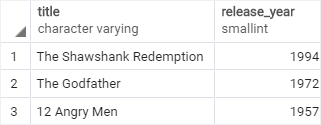

The `most_popular_films` table:

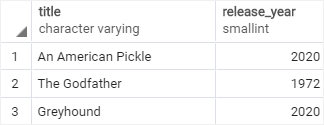

To get popular films which are also top rated films, you use the
`INTERSECT` operator as follows:

``` code
SELECT *
FROM most_popular_films

INTERSECT

SELECT *
FROM top_rated_films;
```

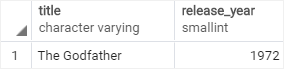

------------------------------------------------------------------------

------------------------------------------------------------------------

## Except

<span class="image"></span>

return the rows in the first query that does not appear in the output of
the second query.

The `top_rated_films` table:

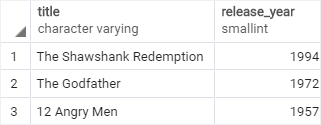

The `most_popular_films` table:

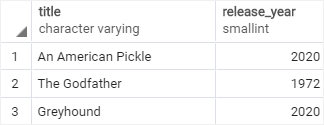

The following statement uses the `EXCEPT` operator to find the top-rated
films that are not popular:

``` code
SELECT * FROM top_rated_films

EXCEPT

SELECT * FROM most_popular_films;
```

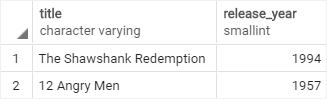

------------------------------------------------------------------------

------------------------------------------------------------------------

# **Modifying Data**

## [Insert](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-insert/)

In PostgreSQL we can insert data and also retrieve the information of
the inserted row.

``` code
# Regualr Insert
INSERT INTO public.actor(
    actor_id, first_name, last_name, last_update)
    VALUES (9999, 'Bar', 'Dadon', (select current_date));


# Insert and Return the row
INSERT INTO public.actor(
    actor_id, first_name, last_name, last_update)
    VALUES (99999, 'Bar', 'Dadon', (select current_date))
RETURNING *;
```

<span class="image"></span>

### **on conflict (column) do**

We can give PostgreSQL instructions on what to do when there’s a
conflict. For example, lets insert a record that already exist.

This insert will raise an error because that actor_id already exists, so
im telling PostgreSQL that if there’s a conflict on the actor_id column,
don't do anything

``` code
INSERT INTO public.actor(
actor_id, first_name, last_name, last_update)
VALUES 
        (1115, 'Bar', 'Dadon', (select current_date))
on conflict (actor_id)
do 
    nothing;
```

Another example, when inserting an actor that already exist, instead of
throwing an error, update the first, last name and last update date of
the actor.

``` code
-- The current actor is this:
select *
from actor
where actor_id in (1115
```

<span class="image"></span>

``` code
-- Update the first, last name and last update date of actors that already exist
INSERT INTO public.actor(
actor_id, first_name, last_name, last_update)
VALUES 
        (1115, 'Bar', 'Dadon', (select current_date))
on conflict (actor_id)
do 
    update set 
        first_name = excluded.first_name, 
        last_name = excluded.last_name,
        last_update = excluded.last_update
```

Lets check the actor again:

``` code
select *
from actor
where actor_id in (1115)
```

<span class="image"></span>

So instead of throwing an error, PostgreSQL simply updated the fields of
the existing row.

### [Insert multiple rows](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-insert-multiple-rows/)

``` code
# Regualr multiple Insert
INSERT INTO public.actor(
actor_id, first_name, last_name, last_update)
VALUES 
        (1111, 'Bar', 'Dadon', (select current_date)),
        (1112, 'Bar', 'Dadon', (select current_date)),
        (1113, 'Bar', 'Dadon', (select current_date));


# Insert multiple rows and Return them
INSERT INTO public.actor(
actor_id, first_name, last_name, last_update)
VALUES 
        (1114, 'Bar', 'Dadon', (select current_date)),
        (1115, 'Bar', 'Dadon', (select current_date)),
        (1116, 'Bar', 'Dadon', (select current_date))
RETURNING *;
```

<span class="image"></span>

## [Update](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-update/)

``` code
-- Regualr update
update actor
set first_name = 'Yuval'
where actor_id = 1114;

-- Regualr update and return the row
update actor
set first_name = 'Yuval'
where actor_id = 1114
RETURNING *;

----------------------------------------------------------------

-- Regular multiple updates
update actor
set first_name = 'Yuval', last_name = 'Something'
where actor_id = 1114;

-- Regular multiple updates and returning the rows
update actor
set first_name = 'Yuval', last_name = 'Something'
where actor_id = 1114
RETURNING *;
```

<span class="image"></span>

### [Update join](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-update-join/) – update values in a table based on values in another table.

## [Delete](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-delete/)

``` code
delete from actor
where actor_id = 1114
RETURNING *;
```

<span class="image"></span>

## [Upsert](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-upsert/)

insert or update data if the new row already exists in the table.

# **Transactions**

To start a transaction use `begin transaction` or just `begin`

## Commit

``` code
begin transaction;

    -- Delete rows with Dadon
    delete from actor
    where last_name = 'Dadon';
    
    -- Insert the actor Bar Dadon
    insert into actor
    (actor_id, first_name, last_name, last_update)
    values
    (1115, 'Bar', 'Dadon', (select CURRENT_DATE));

    -- Update the last name of Bar Dadon
    update actor
    set last_name = 'Not Dadon'
    where last_name = 'Dadon';

commit;
end;
```

## Rollback

``` code
begin transaction;

    -- Delete rows with Dadon
    delete from actor
    where last_name in ('Dadon', 'Not Dadon');
    
    -- Insert the actor Bar Dadon
    insert into actor
    (actor_id, first_name, last_name, last_update)
    values
    (1115, 'Bar', 'Dadon', (select CURRENT_DATE));

    -- Update the last name of Bar Dadon
    update actor
    set last_name = 'Not Dadon'
    where last_name = 'Dadon';

rollback;
end;
```

# PL/pgSQL

## Basic Block Structure

``` code
do $$
<<MyFirstProcedure>> 
declare 
    counter INTEGER;
begin

    select count(*)
    into counter
    from actor
    where last_name != 'Dadon';
    
    raise notice 'The number of not Dadons is: %', counter;
    
end MyFirstProcedure $$;
```

# Variables

-   Syntax:

``` code
variable_name data_type [:= expression];
```

## Initialize a variable and set a value

We can initialize a variable by declaring it in a procedure and give it
a value:

``` code
do $$ 
declare
   counter    integer := 1;
   first_name varchar(50) := 'John';
   last_name  varchar(50) := 'Doe';
   payment    numeric(11,2) := 20.5;
begin 
   raise notice '% % % has been paid % USD', 
       counter, 
       first_name, 
       last_name, 
       payment;
end $$;
```

## Select Into

We set values to the variables inside the script using `into` after a
select clause. For example:

``` code
do $$
declare
    star_wars_movies integer;
    timer time := now();
    start_time time;
    end_time time;
begin

    
    select timer
    into start_time;
    
    select count(*)
    into star_wars_movies
    from film as f
    where lower(f.title) like '%wars%';
    
    raise notice 'The number of Wars movies is: %', star_wars_movies;

    select timer
    into end_time;
    
    raise notice 'The execution time is: %', (end_time - start_time);
    
end $$;
```

## **Copying data types**

If you are not sure what the data types ofa variable should be, simply
copy it from an existing variable in a table.

Here im creating a variable called `movie_name`, but im not sure what
type it should be, all i know is that it should be the same as the type
of the column: `actor.title`

``` code
do $$
<<MyFirstProcedure>> 
declare 
    movie_name film.title%type;
begin

    select title
    into movie_name
    from film
    where title like '%War%'
    limit 1;
    
    raise notice 'The name of the first War movie is: %', movie_name;
    
end MyFirstProcedure $$;
```

### Storing whole rows - Using rowtype

Instead of storing a single value in a variable, we can actually store
an entire row.

``` code
do $$
<<MyFirstProcedure>> 
declare 
    movie_row film%rowtype;
begin

    select *
    into movie_row
    from film
    where title like '%War%'
    limit 1;
    
    raise notice 'The row of the first War movie is: %', movie_row;
    
end MyFirstProcedure $$;
```

### Storing whole rows - Using record

Similiar to rowtype, we can store whole rows in a variable, and instead
of copying the row type from the original table, we can just set the
variable to be of type: record

a `record`variable does not have a predefined structure. The structure
of a `record`variable is determined when the
[`select`](https://www.postgresqltutorial.com/plpgsql-select-into/)` `or
[`for`](https://www.postgresqltutorial.com/plpgsql-for-loop/)` `statement
assigns an actual row to it.

``` code
do $$
<<MyFirstProcedure>> 
declare 
    movie_row record;
begin

    select *
    into movie_row
    from film
    where title like '%War%'
    limit 1;
    
    raise notice 'The row of the first War movie is: %', movie_row;
    
end MyFirstProcedure $$;
```

This method is useful when we dont need to use the entire row, for
example:

This query will fail because the `rec` variable is of type
`film.rowtype`, so postgres expects `rec` to be filled with the entire
structure of the film table.

However im only selecting the columns: title and length. So using
` record` is more suitable here

``` code
-- Wrong Way
do $$
declare
    rec film%rowtype; ---> ERROR:  invalid input syntax for type integer: "Hall Cassidy"
begin
    for rec in select title, length 
            from film 
            where length > 50
            order by length
    loop
        raise notice '% (%)', rec.title, rec.length;  
    end loop;
end; $$

-- Right Way
do $$
declare
    rec record;
begin
    for rec in select title, length 
            from film 
            where length > 50
            order by length
    loop
        raise notice '% (%)', rec.title, rec.length;  
    end loop;
end; $$
```

## Declare in a Declare

Unlike Pl SQL we can actually create declare variables inside declare
statements:

``` code
do $$ 
<<outer_block>>
declare
  counter integer := 0;
begin
   counter := counter + 1;
   raise notice 'The current value of the counter is %', counter;

   declare
       counter integer := 0;
   begin
       counter := counter + 10;
       raise notice 'Counter in the subblock is %', counter;
       raise notice 'Counter in the outer block is %', outer_block.counter;
   end;

   raise notice 'Counter in the outer block is %', counter;
   
end outer_block $$;
```

## Constants

We can also create “variables” that cant be modified.

-   Syntax:

``` code
constant_name constant data_type := expression;
```

For example:

``` code
-- ERROR - Cant change the varialbe 'vat'
do $$ 
declare
   vat constant numeric := 0.1;
   net_price    numeric := 20.5;
begin 
   raise notice 'The selling price is %', net_price * ( 1 + vat);
   vat := 0.05; --> ERROR:  variable "vat" is declared CONSTANT
end $$;


-- This wont caus any errors
do $$ 
declare
   vat constant numeric := 0.1;
   net_price    numeric := 20.5;
begin
   raise notice 'The selling price is %', net_price * ( 1 + vat );
end $$;
```

# **Control structures**

## If - else - elif

### If

-   Syntax:

``` code
# If
if condition then
   statements;
end if;

# Example
do $$
declare
  selected_film film%rowtype;
  input_film_id film.film_id%type := 0;
begin  

  select * from film
  into selected_film
  where film_id = input_film_id;
  
  if not found then
     raise notice'The film % could not be found', 
        input_film_id;
  end if;
end $$
```

### If-else

-   Syntax:

``` code
# If-else
if condition then
  statements;
else
  alternative-statements;
END if;

# Example
do $$
declare
  selected_film film%rowtype;
  input_film_id film.film_id%type := 100;
begin  

  select * from film
  into selected_film
  where film_id = input_film_id;
  
  if not found then
     raise notice 'The film % could not be found', 
        input_film_id;
  else
     raise notice 'The film title is %', selected_film.title;
  end if;
end $$
```

### If-else-elsif

-   Syntax:

``` code
# If-else-elsif
if condition_1 then
  statement_1;
elsif condition_2 then
  statement_2
...
elsif condition_n then
  statement_n;
else
  else-statement;
end if;


# Example
do $$
declare
   v_film film%rowtype;
   len_description varchar(100);
begin  

  select * from film
  into v_film
  where film_id = 100;
  
  if not found then
     raise notice 'Film not found';
  else
      if v_film.length >0 and v_film.length <= 50 then
         len_description := 'Short';
      elsif v_film.length > 50 and v_film.length < 120 then
         len_description := 'Medium';
      elsif v_film.length > 120 then
         len_description := 'Long';
      else 
         len_description := 'N/A';
      end if;
    
      raise notice 'The % film is %.',
         v_film.title,  
         len_description;
  end if;
end $$
```

## CASE

Same as MySQL

``` code
SELECT title,
       length,
       CASE
           WHEN length> 0
                AND length <= 50 THEN 'Short'
           WHEN length > 50
                AND length <= 120 THEN 'Medium'
           WHEN length> 120 THEN 'Long'
       END duration
FROM film
ORDER BY title;
```

``` code
do $$
declare 
    rate   film.rental_rate%type;
    price_segment varchar(50);
begin
    -- get the rental rate
    select rental_rate into rate 
    from film 
    where film_id = 100;
    
    -- assign the price segment
    if found then
        case rate
           when 0.99 then
              price_segment =  'Mass';
           when 2.99 then
              price_segment = 'Mainstream';
           when 4.99 then
              price_segment = 'High End';
           else
              price_segment = 'Unspecified';
           end case;
        raise notice '%', price_segment;  
    end if;
end; $$
```

## LOOP

-   Syntax

``` code
# Example #1 - Simple loop
<<label>>
loop
   statements;
end loop;

# Example #2 - Loop with if statement
<<label>>
loop
   statements;
   if condition then
      exit;
   end if;
end loop;


# Example #3 - Loop within a loop
<<outer>>
loop 
   statements;
   <<inner>>
   loop
     /* ... */
     exit <<inner>>
   end loop;
end loop;
```

-   Example

``` code
do $$
declare
   n integer:= 10;
   fib integer := 0;
   counter integer := 0 ; 
   i integer := 0 ; 
   j integer := 1 ;
begin
    if (n < 1) then
        fib := 0 ;
    end if; 
    loop 
        exit when counter = n ; 
        counter := counter + 1 ; 
        select j, i + j into i, j ;
    end loop; 
    fib := i;
    raise notice '%', fib; 
end; $$
```

## For

The for loop in postgres is really similar to pl sql. The only
difference is that we need to declare the red variable as record first.

``` code
# Syntax
[ <<label>> ]
for loop_counter in [ reverse ] from.. to [ by step ] loop
    statements
end loop [ label ];
```

### Iterate over rows

``` code
do $$

declare 
     rec record;
begin
    for rec in (select * from actor) 
        loop

            raise notice 'hi';

        end loop;
end $$ ;
```

### Iterate over numbers

``` code
# For loop --> from 1 to 5
do $$
begin
   for counter in 1..5 loop
    raise notice 'counter: %', counter;
   end loop;
end; $$

# For loop --> from 5 to 1
do $$
begin
   for counter in reverse 5..1 loop
      raise notice 'counter: %', counter;
   end loop;
end; $$

# For loop --> from 1 to 6, steps of 2
do $$
begin 
  for counter in 1..6 by 2 loop
    raise notice 'counter: %', counter;
  end loop;
end; $$
```

### Iterate over the result set of a dynamic query(advanced)

-   Syntax:

``` code
[ <<label>> ]
for row in execute query_expression [ using query_param [, ... ] ] 
loop
    statements
end loop [ label ];
```

Here im selecting the first_name and last_name from actor, now, based on
the total_number of actors in the table, i will either order by
first_name, last_name or first and last name.

``` code
do $$
declare
    total_actor integer;
    rec record;
    rec_count int := 10;
    query text;
begin

        # Calculating Total number of actors
    select count(*)
    into total_actor
    from actor;
    
        # Setting the base query
    query := 'select first_name, last_name from actor ';
    
        # Add "order by" of either first_name, last_name or first and last name to the query
    if total_actor > 100 then
        query := query || 'order by first_name';
    elsif total_actor between 100 and 300 then
        query := query || 'order by last_name';
    else
        query := query || 'order by first_name, last_name';
    
    end if;
    
        # Add limit 1 to the query
    query := query || ' limit $1';
    
        # Execute the query rec_count times
        # raise notice with the first and last name of the actor
    for rec in execute query using rec_count
        loop
            raise notice '% - %', rec.first_name, rec.last_name;
        end loop;   
end $$;
```

-   Advanced Example

``` code
do $$
declare
    -- sort by 1: title, 2: release year
    sort_type smallint := 1; 
    -- return the number of films
    rec_count int := 10;
    -- use to iterate over the film
    rec record;
    -- dynamic query
    query text;
begin
        
    query := 'select title, release_year from film ';
    
    if sort_type = 1 then
        query := query || 'order by title';
    elsif sort_type = 2 then
      query := query || 'order by release_year';
    else 
       raise 'invalid sort type %s', sort_type;
    end if;

    query := query || ' limit $1';

    for rec in execute query using rec_count
        loop
         raise notice '% - %', rec.release_year, rec.title;
    end loop;
end;
$$
```

## While

``` code
# Syntax
[ <<label>> ]
while condition loop
   statements;
end loop;


do $$
declare 
   counter integer := 0;
begin
   while counter < 5 
        loop
      raise notice 'Counter %', counter;
          counter := counter + 1;
   end loop;
end$$;
```

## EXIT

The exit command lets us terminate a loop and exit the block

-   Syntax:

``` code
exit [label] [when boolean_expression]

-- These Examples are equivalent
exit when counter > 10;

if counter > 10 then
   exit;
end if;
```

Example Iterate through 1 to 5, and stop when counter is equal to 3.

``` code
do $$
begin
for counter in 1..5 
    loop
   
        raise notice 'counter: %', counter;
        
        if counter = 3 then
            exit;
        end if;
        
     end loop;
end; $$


# OR

do $$
begin
for counter in 1..5 
    loop
   
        raise notice 'counter: %', counter;
        
        exit when counter = 3;
        
     end loop;
end; $$
```

## Continue

Similiar to exit, given a boolean condition we can let posrgres know to
continue some block.

for example, we use continue to iterate over 1 to 5 with steps of 2.

``` code
do $$
begin
for counter in 1..5 
    loop
        continue when mod(counter,2) = 0;
        
        raise notice 'counter: %', counter;  
        
     end loop;
end; $$
```

# Functions

## Create Function

-   Syntax:

``` code
create [or replace] function function_name(param_list)
   returns return_type 
   language plpgsql
  as
$$
declare 
-- variable declaration
begin
 -- logic
end;
$$
```

As we can see, we can actually specify the language that we use, in this
case its plpgsql. Postgres actually supports many languages not just
plpgsql.

## Function with Input

-   Function that accepts a country’s and returns the number of cities
    it has.

``` code
drop function if exists country_and_city;
create function country_and_city(input_country varchar(50))
    returns integer
    LANGUAGE plpgsql
    as
$$
declare
    num_of_cities integer;
begin

    select 
        count(c2.city_id)
    into num_of_cities
    from country as c1
    join city as c2
    on c1.country_id = c2.country_id
    where c1.country = input_country
    group by c1.country;
    
    raise notice 'The number of cities the country % has is: %', input_country, num_of_cities;
    return num_of_cities;
    
end $$;


select country_and_city('Argentina');
```

## Function with Output

-   Function that accepts a country’s and returns the number of cities
    it has.

This function is essentially the same,

``` code
drop function if exists country_and_city;
create function country_and_city(input_country varchar(50), out output_num_of_cities integer)
    LANGUAGE plpgsql
    as
$$
begin

    select 
        count(c2.city_id)
    into output_num_of_cities
    from country as c1
    join city as c2
    on c1.country_id = c2.country_id
    where c1.country = input_country
    group by c1.country;
    
    raise notice 'The number of cities the country % has is: %', input_country, output_num_of_cities;    
end $$;


select country_and_city('Argentina');
```

Functions with an `out `parameter are essentially the same as without,
the only difference is that previously we had to specify
`returns integer` ` return num_of_cities;` and here we just need to
specify the output parameter.

I think this method is the most comfortable to work with.

## Function with InOutput

In PostgreSQL a parameter can be both the input and the output, for
example:

``` code
create or replace function swap(
    inout x int,
    inout y int
) 
language plpgsql    
as $$
begin
   select x,y into y,x;
end; $$;
```

## Functions that return a table

Use this resource when you want to return a table:

<figure>
<img src="attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/d9e7e1f6a5a2a20631fd04f5fb0d533a0f9c68fc.png" class="icon bookmark-icon" />
</figure>

When we want to return a whole row or a table instead of a single value
we should specify that we want to `returns table ( column_list )` and
call the function using `select * <FunctionName>`

Without these, returning a row or a table looks like this:

``` code
drop function if exists country_and_city;
create function country_and_city(input_country varchar(50), out entire_row record)
    LANGUAGE plpgsql
    as
$$
begin

    select *
    into entire_row
    from country as c1
    join city as c2
    on c1.country_id = c2.country_id
    where c1.country = input_country;
    
end $$;
```

``` code
select country_and_city('Argentina');
```

<span class="image"></span>

The right way to write this function is this:

``` code
drop function if exists country_and_city;
create function country_and_city(input_country varchar(50))
returns table (
    country_id country.country_id%type,
    country country.country%type,
    last_update country.last_update%type,
    city city.city%type)
    LANGUAGE plpgsql
    as
$$
declare
    rec record;
begin

    for rec in (
        select 
            c1.country_id,
            c1.country,
            c1.last_update,
            c2.city
        from country as c1
        join city as c2
        on c1.country_id = c2.country_id
        where c1.country = input_country
    ) loop
    
    country_id := rec.country_id;
    country := rec.country;
    last_update := rec.last_update;
    city := rec.city;
    
    return next;
    end loop;  
end $$;


select * from country_and_city('Argentina');
```

<span class="image"></span>

### Examples:

``` code
create function is_bigger(input_table_name1 varchar(30), input_table_name2 varchar(30)) 
returns boolean as $$
declare
    rows_counter1 integer;
    rows_counter2 integer;
begin

    EXECUTE 'SELECT COUNT(*) FROM ' || input_table_name1 INTO rows_counter1;
    
    EXECUTE 'SELECT COUNT(*) FROM ' || input_table_name2 INTO rows_counter2;

    
    if rows_counter1 > rows_counter2 then
        return True;
    else
        return False;
    end if;
end $$
language plpgsql;
```

# Stored Procedures

The main drawbacks of functions is that we cant execute transactions in
them, we cant commit or rollback something in a function.

Stored procedures however support transactions.

Another major difference between procedures and functions is that
procedures dont really return anything. Procedures can create tables,
insert rows, update or select rows and so on, but they dont return
anything.

-   Syntax:

``` code
create [or replace] procedure procedure_name(parameter_list)
language plpgsql
as $$
declare
-- variable declaration
begin
-- stored procedure body
end; $$


-- Call a stored procedure
call stored_procedure_name(argument_list);
```

Example

This procedure is just a transaction that updates the balance of a user
and his account.

``` code
create or replace procedure transfer(
   sender int,
   receiver int, 
   amount dec
)
language plpgsql    
as $$
begin
    -- subtracting the amount from the sender's account 
    update accounts 
    set balance = balance - amount 
    where id = sender;

    -- adding the amount to the receiver's account
    update accounts 
    set balance = balance + amount 
    where id = receiver;

    commit;
end;$$


call transfer(1,2,1000);
```

# **Cursor**

Looks like the syntax for cursors in postgres is a bit more complicated
than in plsql, but the logic is the same.

In postrgres a cursor allows us to encapsulate a query and process each
individual row at a time.

So we can use cursors to divide a large result set into parts and
process each part individually.

The steps are:

-   First, declare a cursor.

<!-- -->

-   Next, open the cursor.

<!-- -->

-   Then, fetch rows from the result set into a target.

<!-- -->

-   After that, check if there is more row left to fetch. If yes, go to
    step 3, otherwise, go to step 5.

<!-- -->

-   Finally, close the cursor.

``` code
create or replace function get_film_titles(p_year integer)
   returns text as $$
declare 
     titles text default '';
     rec_film   record;
     cur_films cursor(p_year integer) 
         for select title, release_year
         from film
         where release_year = p_year;
begin
   -- open the cursor
   open cur_films(p_year);
    
   loop
    -- fetch row into the film
      fetch cur_films into rec_film;
    -- exit when no more row to fetch
      exit when not found;

    -- build the output
      if rec_film.title like '%ful%' then 
         titles := titles || ',' || rec_film.title || ':' || rec_film.release_year;
      end if;
   end loop;
  
   -- close the cursor
   close cur_films;

   return titles;
end; $$

language plpgsql;

-- Call the function
select get_film_titles(2006);
```

# Trigger

<figure>
<img src="attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/0ee0a47fdd642ffdce7c682fa571e0b7f45591d6.png" class="icon bookmark-icon" />
</figure>

Triggers in Postgres are different from MySQL. Here we have to create a
function that holds the logic of the trigger, And create the actual
trigger that will use the function.

-   Syntax:

``` code
-- 1. Creating the function
CREATE FUNCTION trigger_function() 
   RETURNS TRIGGER 
   LANGUAGE PLPGSQL
AS $$
BEGIN
   -- trigger logic
END;
$$

-- 2. Creating the trigger - The tigger will execute the function
CREATE TRIGGER trigger_name 
   {BEFORE | AFTER} { event }
   ON table_name
   [FOR [EACH] { ROW | STATEMENT }]
       EXECUTE PROCEDURE trigger_function
```

<span style="border-bottom:0.05em solid">**Function**</span>

Use the keywords `OLD` and `NEW` to refer the original rows and the new
rows.

<span style="border-bottom:0.05em solid">**Trigger**</span>

First, specify the name of the trigger after the `TRIGGER` keywords.

Second, specify the timing that cause the trigger to fire. It can be
`BEFORE` or `AFTER` an event occurs.

Third, specify the event that invokes the trigger. The event can be
`INSERT` , `DELETE`, `UPDATE` or `TRUNCATE`.

Fourth, specify the name of the table associated with the trigger after
the `ON` keyword.

Fifth, specify the type of triggers which can be:

-   Row-level trigger that is specified by the `FOR EACH ROW` clause.

<!-- -->

-   Statement-level trigger that is specified by the
    `FOR EACH STATEMENT` clause.

<!-- -->

-   Example

``` code
-- Create a table called test
drop table if exists test cascade;
create table test(
user_id int not null primary key,
first_name varchar(30),
last_name varchar(30)
);

# Insert three rows
insert into test(user_id, first_name, last_name)
values
(1,'Bar', 'Dadon'), (2, 'Yuval', 'Dadon'), (3, 'Dekel', 'Dadon');

# Create a trigger function
# When a user is inserted to the table and his name is Bar, update the old value of Bar to Bar2
drop function if exists trigger_function cascade;
create function trigger_function()
    returns trigger
    language plpgsql
as $$
begin

    if new.first_name = 'Bar' then
    
        update test
        set first_name = 'Bar2'
        where first_name = 'Bar';
        
     end if;
     
     return new;
end $$;

# Create the trigger itself.
# Before inserts, execute the function for each row in the table.
drop trigger if exists update_duplicate_bar on test;
create trigger update_duplicate_bar
before insert
on test
for each row
execute procedure trigger_function();

# Test the trigger - Insert a new row of a 'Bar'
insert into test(user_id, first_name, last_name)
values
(4,'Bar', 'Dadon');

# Check that the trigger worked.
# The older record should have the first name of "Bar2"
select *
from test
where first_name like '%Bar%';
```

``` code
1    "Bar2"    "Dadon"
4   "Bar" "Dadon"
```

Success.

# Views

A view is a named query. Notice that a view does not store data
physically.

views are virtual tables that represent data of the underlying tables.
Simple views can be also updatable.

<figure>
<img src="attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/0ee0a47fdd642ffdce7c682fa571e0b7f45591d6.png" class="icon bookmark-icon" />
</figure>

-   Syntax

``` code
CREATE VIEW view_name AS query;
```

-   Example

``` code
drop view if exists BarOrYuval;
create view BarOrYuval as
select *
from test
where first_name = 'Bar' or first_name = 'Yuval';

select *
from BarOrYuval;


-- Output
1   "Bar" "Dadon"
2   "Yuval"   "Dadon"
```

# **Materialized Views**

PostgreSQL extends the view concept to the next level that allows views
to store data physically. And these views are called materialized views.

Materialized views cache the result of a complex and expensive query and
allow you to refresh this result periodically.

The materialized views are useful in many cases that require fast data
access therefore they are often used in data warehouses and business
intelligence applications.

-   Syntax

``` code
CREATE MATERIALIZED VIEW view_name
AS
query
WITH [NO] DATA;
```

-   In case you use `WITH NO DATA`, the view is flagged as unreadable.
    It means that you cannot query data from the view until you load
    data into it.

### Refreshing data for materialized views

To load data into a materialized view, you use the
 `REFRESH MATERIALIZED VIEW` statement as shown below:

``` code
REFRESH MATERIALIZED VIEW view_name;
```

When you refresh data for a materialized view, PostgreSQL locks the
entire table therefore you cannot query data against it. To avoid this,
you can use the `CONCURRENTLY` option.

``` code
REFRESH MATERIALIZED VIEW CONCURRENTLY view_name;
```

With `CONCURRENTLY` option, PostgreSQL creates a temporary updated
version of the materialized view, compares two versions, and performs
[INSERT](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-insert/)
and
[UPDATE](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-update/)
only the differences.

You can query against a materialized view while it is being updated. One
requirement for using `CONCURRENTLY` option is that the materialized
view must have a `UNIQUE` index.

-   Example:

``` code
drop materialized view if exists BarOrYuval_materialized;
create materialized view BarOrYuval_materialized as
select *
from test
where first_name = 'Bar' or first_name = 'Yuval';

select *
from BarOrYuval_materialized;

-- Output
1   "Bar" "Dadon"
2   "Yuval"   "Dadon"
```

# Indexes

``` code
CREATE INDEX "index_name"
ON "table_name" ("column1", "column2", "columnN");

ALTER TABLE "table_name" 
ADD INDEX "index_name" ("column2", "column2", "columnN");
```

<figure>
<img src="attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/0ee0a47fdd642ffdce7c682fa571e0b7f45591d6.png" class="icon bookmark-icon" />
</figure>

# **Reporting messages and errors**

## Raise

To raise a message in postgres, use the `raise ` statement:

-   Syntax:

``` code
raise level format;
```

-   The `level` can be any of these:
    -   `debug`

    <!-- -->

    -   `log`

    <!-- -->

    -   `notice`

    <!-- -->

    -   `info`

    <!-- -->

    -   `warning`

    <!-- -->

    -   `exception` - Default

<!-- -->

-   The `format ` is a string message

To raise an error use the `raise exception` level. After rasing an
exception, it is best practice to add some information using the syntax:

``` code
using option = expression
```

-   The `option `can be any of these:
    -   `message`: set error message

    <!-- -->

    -   `hint`: provide the hint message so that the root cause of the
        error is easier to be discovered.

    <!-- -->

    -   `detail`: give detailed information about the error.

    <!-- -->

    -   `errcode`: identify the error code, which can be either by
        condition name or directly five-character `SQLSTATE` code.
        Please refer to the [table of error codes and condition
        names](https://www.postgresql.org/docs/current/static/errcodes-appendix.html).

For example, if there’s a duplicate email, raise an exception that says
“duplicate email” plus the email itself.

Also, add an option of type “hint”, that says “check the email again”.

``` code
do $$ 
declare
  email varchar(255) := 'info@postgresqltutorial.com';
begin 

-- Some logic about checking duplicate emails --

  raise exception 'duplicate email: %', email 
        using hint = 'check the email again';
end $$;
```

To give further invormation we can `raise sqlstate` and error codes:

[table of error codes and condition
names](https://www.postgresql.org/docs/current/static/errcodes-appendix.html):

``` code
-- Example #1 - raise sqlstate
do $$ 
begin 
    --...
    raise sqlstate '2210b';
end $$;

-- Example #2 - raise errorcode
do $$ 
begin 
    --...
    raise invalid_regular_expression;
end $$;
```

## Assert

The `assert` statement is a useful shorthand for inserting debugging
checks into PL/pgSQL code.

-   Syntax:

``` code
assert condition [, message];
```

### 1) condition

The `condition` is a Boolean expression that is expected to always
return `true`.

If the `condition` evaluates to `true`, the `assert` statement does
nothing.

In case the `condition` evaluates to `false` or `null`, PostgreSQL
raises an `assert_failure` exception.

### 2) message

The message is optional.

If you don’t pass the `message`, PostgreSQL uses the
“`assertion failed`” message by default. In case you pass the `message`
to the `assert` statement, it will use it to replace the default
message.

For example, This script will count the films into a variable, and
assert that the number if bigger than 0, otherwise, it will issue an
error.

``` code
do $$
declare 
   film_count integer;
begin
   select count(*)
   into film_count
   from film;
   
   assert film_count > 0, 'Film not found, check the film table';
end$$;
```

## Error Handling in Procedures

Complete list of error codes:

<https://www.postgresql.org/docs/current/errcodes-appendix.html>

The idea and syntax is pretty much the same. All we need is to add the
command `exception` and then raise errors and exceptions using the same
logic as a `CASE `statement

-   Syntax:

``` code
<<label>>
declare
begin
    statements;
exception
    when condition [or condition...] then
       handle_exception;
   [when condition [or condition...] then
       handle_exception;]
   [when others then
       handle_other_exceptions;
   ]
end;
```

-   Example

``` code
do
$$
declare
    rec record;
    v_film_id int = 2000;
begin
    -- select a film 
    select film_id, title 
    into strict rec
    from film
    where film_id = v_film_id;
        -- catch exception
    exception 
       when no_data_found then 
          raise exception 'film % not found', v_film_id;
end;
$$
language plpgsql;
```

In this case, if the error code “no_data_found” is being raised, we
manually raise eception that says ‘film not found’ plus the id of the
film

The complete list of error codes can be found here:

<figure>
<img src="attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/562271ffb58c1dd39ba848c6af74993aed8a7949.ico" class="icon bookmark-icon" />
</figure>

We can have multiple exceptions in a query:

``` code
do
$$
declare
    rec record;
    v_film_id int = 2000;
    v_length int = 90;
begin

    -- select a film 
    select film_id, title 
    into strict rec
    from film
    where film_id = v_film_id;

-- select a film 
    select film_id, title 
    into strict rec
    from film
    where length = v_length;

        -- catch exception
    exception 
       when no_data_found then 
          raise exception 'film % not found', v_film_id;

        when too_many_rows then 
          raise exception 'Search query returns too many rows';

        when sqlstate 'P0002' then 
          raise exception 'film with length % not found', v_length;

        when sqlstate 'P0003' then 
          raise exception 'The with length % is not unique', v_length;



end;
$$
language plpgsql;
```

# **Import & Export Data**

## **Import CSV File Into PostgreSQL Table**

### Import CSV file using cli shell/code

Before importing a csv file into a table we need to create it first.

``` code
CREATE TABLE persons (
  id SERIAL,
  first_name VARCHAR(50),
  last_name VARCHAR(50),
  dob DATE,
  email VARCHAR(255),
  PRIMARY KEY (id)
)
```

I saved a csv file in the location: `C:\sampledb\persons.csv`

``` code
COPY persons(first_name, last_name, dob, email)
FROM 'C:\sampledb\persons.csv'
DELIMITER ','
CSV HEADER;
```

That’s it. Lets verify it:

``` code
select *
from persons;
```

<span class="image"></span>

### Import CSV file into a table using pgAdmin

In case you need to import a CSV file from your computer into a table on
the PostgreSQL database server, you can use the pgAdmin.

The following statement
[truncates](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-truncate-table/)
the `persons` table so that you can re-import the data.

``` code
TRUNCATE TABLE persons
RESTART IDENTITY;
```

First, right-click the `persons` table and select the **Import/Export…**
menu item:

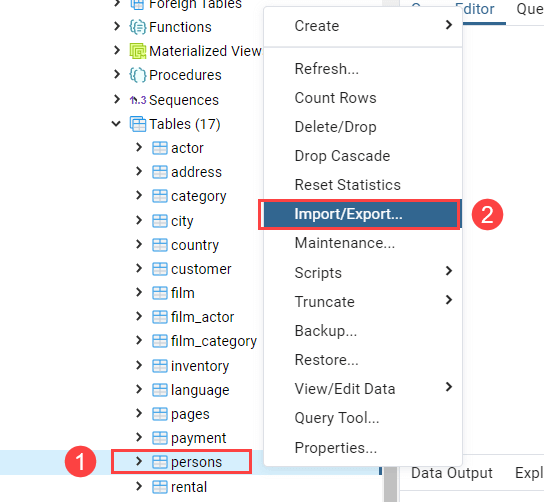

Second, (1) switch to import, (2) browse to the import file, (3) select
the format as CSV, (4) select the delimiter as comma (`,`):

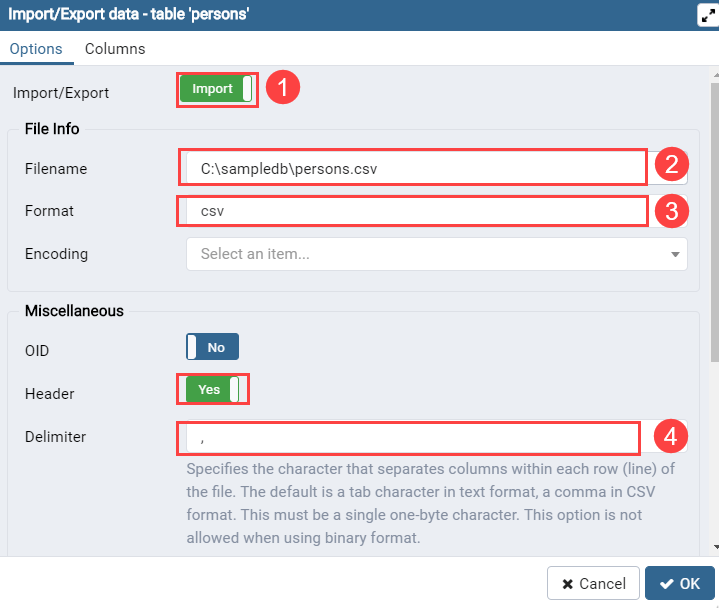

Third, click the columns tab, uncheck the id column, and click the OK
button:

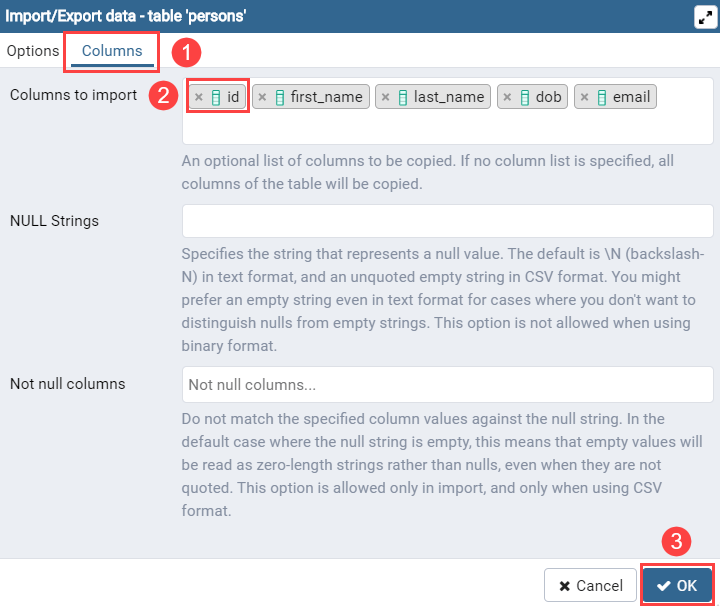

Finally, wait for the import process to complete. The following shows
the dialog that inform you the progress of the import:

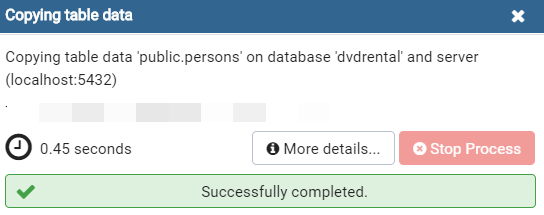

## **Export PostgreSQL Table To CSV File**

### Export CSV file using cli shell/code

Lets export this table:

``` code
select *
from persons;
```

<span class="image"></span>

ill save this file in: `C:\tmp\persons_db.csv`

``` code
COPY persons 
TO 'C:\tmp\persons_db.csv' 
DELIMITER ',' 
CSV HEADER;
```

<span class="image"></span>

We also can export only specific columns:

``` code
COPY persons (first_name,last_name)
TO 'C:\tmp\persons_db_names.csv' 
DELIMITER ',' 
CSV HEADER;
```

Or export without headers

``` code
COPY persons (first_name,last_name)
TO 'C:\tmp\persons_db_names.csv' 
DELIMITER ',' 
CSV;
```

### Export data from a table to CSV file using the `\copy` command

In case you have the access to a remote PostgreSQL database server, but
you don’t have sufficient privileges to write to a file on it, you can
use the PostgreSQL built-in command `\copy`.

The `\copy` command basically runs the `COPY `statement above. However,
instead of server writing the CSV file, psql writes the CSV file,
transfers data from the server to your local file system. To use `\copy`
command, you just need to have sufficient privileges to your local
machine. It does not require PostgreSQL superuser privileges.

For example, if you want to export all data of the `persons` table into
`persons_client.csv` file, you can execute the `\copy` command from the
psql client as follows:

``` code
\copy (SELECT * FROM persons) to 'C:\tmp\persons_client.csv' with csv
```

# Built-In Functions

## String Function

### \|\| - Concat

``` code
select firstname || ' ' || lastname
from employees
```

### Substring(Column, Start, End)

``` code
select substring(firstname, 0, length(firstname) - 2)
from employees
```

## Mathematical Functions

### abs ( numeric_type ) → numeric_type

``` code
abs ( numeric_type ) → numeric_type
Returns Absolute value

abs(-17.4) → 17.
```

``` code
select abs(-20)
```

### cbrt ( double precision ) → double precision

``` code
cbrt ( double precision ) → double precision
Cube root
cbrt(64.0) → 4
```

### ceil ( numeric ) → numeric

``` code
ceil ( double precision ) → double precision
Nearest integer greater than or equal to argument
ceil(42.2) → 43
ceil(-42.8) → -42
```

``` code
select ceil(0.6)
```

### degrees ( double precision ) → double precision

``` code
degrees ( double precision ) → double precision
Converts radians to degrees
degrees(0.5) → 28.64788975654116
```

``` code
select 
    degrees(1*pi()),
    degrees(2*pi())
```

### div ( y numeric, x numeric ) → numeric

``` code
div ( y numeric, x numeric ) → numeric
Integer quotient of y/x (truncates towards zero)
div(9, 4) → 2
```

``` code
select 
    div(4,2),
    (4 / 2)
```

## DateTime

### Cast() + date_trunc()

Change the data type of a column

``` code
select 
  cast(date_trunc('day' , s.transaction_date) as date) as day,
  d.name as "department",
  count(*) as sale_count
from sale as s
join department as d on
  s.department_id = d.id
group by 
  cast(date_trunc('day' , s.transaction_date) as date),
  d.name
 
order by d.name,
          cast(date_trunc('day' , s.transaction_date) as date)
```

### extract()

Extract the date using a statement, for example:
`extract(‘year’ from last_update)` produces the year

``` code
select 
    actor_id,
    first_name,
    last_name,
    case
        when extract('year' from last_update) > 2013 then 'Hi'
        else 'Bye'
    end as Hi_Or_Bye
from actor;
```

## Others

### Random() - generate a random float

``` code
select random()

"random"
0.5965693709098119
```

-   Generate a number between 1-11

``` code
SELECT random() * 10 + 1 AS RAND_1_11;

"rand_1_11"
4.160414320485536
```

-   Generate it as an integer

``` code
SELECT floor(random() * 10 + 1)::int;


"floor"
8
```

# Data Types

<figure>
<img src="attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/0ee0a47fdd642ffdce7c682fa571e0b7f45591d6.png" class="icon bookmark-icon" />
</figure>

<figure>
<img src="attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/562271ffb58c1dd39ba848c6af74993aed8a7949.ico" class="icon bookmark-icon" />
</figure>

------------------------------------------------------------------------

------------------------------------------------------------------------

# Operators

<https://www.postgresql.org/docs/6.3/c09.htm>

Table 9-1. Postgres Operators

|          |                                          |                                        |
|----------|------------------------------------------|----------------------------------------|
| Operator | Description                              | Usage                                  |
| \<       | Less than?                               | 1 \< 2                                 |
| \<=      | Less than or equal to?                   | 1 \<= 2                                |
| \<\>     | Not equal?                               | 1 \<\> 2                               |
| =        | Equal?                                   | 1 = 1                                  |
| \>       | Greater than?                            | 2 \> 1                                 |
| \>=      | Greater than or equal to?                | 2 \>= 1                                |
| \|\|     | Concatenate strings                      | 'Postgre' \|\| 'SQL'                   |
| !!=      | NOT IN                                   | 3 !!= i                                |
| \~\~     | LIKE                                     | 'scrappy,marc,hermit' \~\~ '%scrappy%' |
| !\~\~    | NOT LIKE                                 | 'bruce' !\~\~ '%al%'                   |
| \~       | Match (regex), case sensitive            | 'thomas' \~ '\*.thomas\*.'             |
| \~\*     | Match (regex), case insensitive          | 'thomas' \~\* '\*.Thomas\*.'           |
| !\~      | Does not match (regex), case sensitive   | 'thomas' !\~ '\*.Thomas\*.'            |
| !\~\*    | Does not match (regex), case insensitive | 'thomas' !\~ '\*.vadim\*.'             |

Table 9-2. Postgres Numerical Operators

|          |                           |            |
|----------|---------------------------|------------|
| Operator | Description               | Usage      |
| !        | Factorial                 | 3 !        |
| !!       | Factorial (left operator) | !! 3       |
| %        | Modulo                    | 5 % 4      |
| %        | Truncate                  | % 4.5      |
| \*       | Multiplication            | 2 \* 3     |
| \+       | Addition                  | 2 + 3      |
| \-       | Subtraction               | 2 - 3      |
| /        | Division                  | 4 / 2      |
| :        | Natural Exponentiation    | : 3.0      |
| ;        | Natural Logarithm         | (; 5.0)    |
| @        | Absolute value            | @ -5.0     |
| ^        | Exponentiation            | 2.0 ^ 3.0  |
| \|/      | Square root               | \|/ 25.0   |
| \|\|/    | Cube root                 | \|\|/ 27.0 |

Table 9-3. Postgres Geometric Operators

|          |                             |                                                       |
|----------|-----------------------------|-------------------------------------------------------|
| Operator | Description                 | Usage                                                 |
| \+       | Translation                 | '((0,0),(1,1))'::box + '(2.0,0)'::point               |
| \-       | Translation                 | '((0,0),(1,1))'::box - '(2.0,0)'::point               |
| \*       | Scaling/rotation            | '((0,0),(1,1))'::box \* '(2.0,0)'::point              |
| /        | Scaling/rotation            | '((0,0),(2,2))'::box / '(2.0,0)'::point               |
| \#       | Intersection                | '((1,-1),(-1,1))' \# '((1,1),(-1,-1))'                |
| \#       | Number of points in polygon | \# '((1,0),(0,1),(-1,0))'                             |
| \#\#     | Point of closest proximity  | '(0,0)'::point \#\# '((2,0),(0,2))'::lseg             |
| &&       | Overlaps?                   | '((0,0),(1,1))'::box && '((0,0),(2,2))'::box          |
| &\<      | Overlaps to left?           | '((0,0),(1,1))'::box &\< '((0,0),(2,2))'::box         |
| &\>      | Overlaps to right?          | '((0,0),(3,3))'::box &\> '((0,0),(2,2))'::box         |
| \<-\>    | Distance between            | '((0,0),1)'::circle \<-\> '((5,0),1)'::circle         |
| \<\<     | Left of?                    | '((0,0),1)'::circle \<\< '((5,0),1)'::circle          |
| \<^      | Is below?                   | '((0,0),1)'::circle \<^ '((0,5),1)'::circle           |
| \>\>     | Is right of?                | '((5,0),1)'::circle \>\> '((0,0),1)'::circle          |
| \>^      | Is above?                   | '((0,5),1)'::circle \>^ '((0,0),1)'::circle           |
| ?\#      | Intersects or overlaps      | '((-1,0),(1,0))'::lseg ?\# '((-2,-2),(2,2))'::box;    |
| ?-       | Is horizontal?              | '(1,0)'::point ?- '(0,0)'::point                      |
| ?-\|     | Is perpendicular?           | '((0,0),(0,1))'::lseg ?-\| '((0,0),(1,0))'::lseg      |
| @-@      | Length or circumference     | @-@ '((0,0),(1,0))'::path                             |
| ?\|      | Is vertical?                | '(0,1)'::point ?\| '(0,0)'::point                     |
| ?\|\|    | Is parallel?                | '((-1,0),(1,0))'::lseg ?\|\| '((-1,2),(1,2))'::lseg   |
| @        | Contained or on             | '(1,1)'::point @ '((0,0),2)'::circle                  |
| @@       | Center of                   | @@ '((0,0),10)'::circle                               |
| \~=      | Same as                     | '((0,0),(1,1))'::polygon \~= '((1,1),(0,0))'::polygon |

The time interval data type tinterval is a legacy from the original
date/time types and is not as well supported as the more modern types.
There are several operators for this type.

Table 9-4. Postgres Time Interval Operators

|          |                                    |       |
|----------|------------------------------------|-------|
| Operator | Description                        | Usage |
| \#\<     | Interval less than?                |       |
| \#\<=    | Interval less than or equal to?    |       |
| \#\<\>   | Interval not equal?                |       |
| \#=      | Interval equal?                    |       |
| \#\>     | Interval greater than?             |       |
| \#\>=    | Interval greater than or equal to? |       |
| \<\#\>   | Convert to time interval           |       |
| \<\<     | Interval less than?                |       |
| \|       | Start of interval                  |       |
| \~=      | Same as                            |       |
| \<?\>    | Time inside interval?              |       |

# General Examples and Queries

### Add :: to cast the data type of the output

``` code
SELECT floor(random() * 10 + 1);

Output:
    "floor"(double precision)
    7

SELECT floor(random() * 10 + 1)::int;

Output:
    "floor"(Integer)
    7
```

### Cast, date_trunc

``` code
select 
  cast(date_trunc('day' , s.transaction_date) as date) as day,
  d.name as "department",
  count(*) as sale_count
from sale as s
join department as d on
  s.department_id = d.id
group by 
  cast(date_trunc('day' , s.transaction_date) as date),
  d.name
 
order by d.name,
          cast(date_trunc('day' , s.transaction_date) as date)
```

## Percentile(Or Median)

``` code
select 
  min(id),
  max(id),
  percentile_disc(0.5) within group (order by id) as median
from student
```

## Returning Void

We can tell Postgres that a function will be returning None by writing
`returns void`

In this case, i just wanted to count to 5. But, as it as, if ill only
raise messages without returning something, postgres will throw an
error.

So, we can keep everything as it is, and just add `returns void`

``` code
drop function if exists count_to_five;

create function count_to_five() returns void
LANGUAGE plpgsql as $$

declare 
    counter integer := 0;
begin

    while counter < 5 loop
    
        raise notice 'Counter %', counter;
        counter := counter + 1;
        
    end loop;
end $$;


select * from count_to_five();
```

In this case, Postgres ill both print the messages:

``` code
NOTICE:  Counter 0
NOTICE:  Counter 1
NOTICE:  Counter 2
NOTICE:  Counter 3
NOTICE:  Counter 4

Successfully run. Total query runtime: 47 msec.
1 rows affected.
```

And return nothing:

<span class="image"></span>

## Using other languages than plgsql, such as Python

The `$$` syntax in PostgreSQL is used to define a block of SQL code that
can be executed as a single unit. It is often used to define stored
procedures, functions, and triggers in PostgreSQL.

The `language` clause specifies the programming language that is used to
write the code block. In the example you provided, the code block is
written in PL/pgSQL, which is a procedural language that is specifically
designed for PostgreSQL.

The `end` keyword is used to end the code block.

<span style="border-bottom:0.05em solid">**Available languages in
PostgreSQL**</span>

1.  PL/pgSQL: This is a procedural language that is specifically
    designed for PostgreSQL. It is similar to other procedural languages
    like SQL/PSM (SQL Procedural Language) and PL/SQL (Procedural
    Language/SQL).

<!-- -->

1.  Tcl (Tool Command Language): This is a high-level, interpreted
    language that is commonly used for rapid prototyping, testing, and
    writing system tools.

<!-- -->

1.  Python: This is a high-level, interpreted language that is widely
    used for a variety of purposes, including web development, data
    analysis, and artificial intelligence.

<!-- -->

1.  C: This is a low-level, compiled language that is commonly used for
    system programming and performance-critical applications.

<!-- -->

1.  Perl: This is a high-level, interpreted language that is commonly
    used for text processing, system administration, and web
    development.

In addition to these languages, PostgreSQL also supports a number of
other languages that can be used to write code blocks, including R,
Ruby, and Shell scripts. You can use the `language` clause to specify
which language you want to use to write your code block.

<span style="border-bottom:0.05em solid">**For example - Python**</span>

``` code
CREATE OR REPLACE FUNCTION get_employee_names()
RETURNS SETOF TEXT AS $$
import psycopg2

def run_query():
    try:
        connection = psycopg2.connect(user="user",
                                      password="password",
                                      host="host",
                                      port="port",
                                      database="database")
        cursor = connection.cursor()
        postgreSQL_select_Query = "SELECT name FROM employees"

        cursor.execute(postgreSQL_select_Query)
        return cursor.fetchall()

    except (Exception, psycopg2.Error) as error:
        print("Error while fetching data from PostgreSQL", error)

    finally:
        if(connection):
            cursor.close()
            connection.close()
            print("PostgreSQL connection is closed")

return run_query() $$
LANGUAGE python;
```

### Using \$1 to fetch the first argument in a function

``` code
create or replace function increment(n integer ) 
returns integer as $$
begin

  return $1 + 1; -- $1 represent the first argument(n)
  
end$$
language plpgsql;
```

### Creating an SQL function(not a plpgsql function)

``` code
CREATE FUNCTION increment(i integer) RETURNS integer
AS 'select $1 + 1;'
LANGUAGE sql;
```

# General Tips and Discussion

### Why do we have to use a sub-query to references an alias column

``` code
-- Wrong
select 
    ename as Employee_Name,
    deptno as Deptartment_NUmber,
    sal as Salary
from emp
where Deptartment_NUmber = 20;

-- Correct
select *
from
(
    select 
        ename as Employee_Name,
        deptno as Deptartment_NUmber,
        sal as Salary
    from emp
) as aaa
where Deptartment_NUmber = 20;

/* Discussion
1. The WHERE clause is evaluated before the SELECT. 
That is why Postgres does not know that "Deptartment_NUmber" is an alias for deptno in the first query.

2. However, FROM is evaluated before WHERE.
That is why Postgres is able to detect the inner query before "where Deptartment_NUmber = 20;"
*/
```

## **Reset Forgotten Password For postgres User**

What happens when the superuser `postgres` forgets his account?

Luckily, we can reset the password in Postgres by changing the
configuration in `pg_hba.conf` to trust all users, log in as the
`postgres` user, change his password, and restore the configuration file
to its original state.

The following steps show you how to reset a password for the `postgres`
user:

**Step 1**. Backup the `pg_hba.conf` file by copying it to a different
location or just rename it to `pg_hba.conf.bk`

**Step 2**. Edit the `pg_dba.conf`file and change all local connections
from md5 to trust. By doing this, you can log in to the PostgreSQL
database server without using a password.

``` code
# TYPE  DATABASE        USER            ADDRESS                 METHOD

# IPv4 local connections:
host    all             all             127.0.0.1/32            trust
# IPv6 local connections:
host    all             all             ::1/128                 trust
# Allow replication connections from localhost, by a user with the
# replication privilege.
host    replication     all             127.0.0.1/32            trust
host    replication     all             ::1/128                 trust
```

**Step 3**. Restart the PostgreSQL server. If you are on Windows, you
can restart the PostgreSQL from **Services**:

<span class="image"></span>

Or run this command:

``` code
pg_ctl -D "C:\Program Files\PostgreSQL\12\data" restart
```

**Step 4**. Connect to PostgreSQL database server using any tool such as
psql or pgAdmin:

``` code
psql -U postgres
```

**Step 5**. Execute the following command to set a new password for the
`postgres` user.

``` code
postgres=# ALTER USER postgres WITH PASSWORD 'new_password';
```

**Step 6**. Restore the `pg_dba.conf` file, restart the PostgreSQL
database server and connect to the PostgreSQL database server with the
new password.

## **postgresql.conf**

Whenever you connect to a database, PostgreSQL loads the configuration
variables from the `postgresql.conf`file and uses these variables by
default.

## pg_hba.conf(hba = host based authentication)

configuration file stored in the database data directory (e.g.,
`C:\Program Files\PostgreS\12\data` on Windows)

This configuration file is in charge of whether or not postgres will
trust certain hosts and users.

## Postgres Hierarchical evaluation of commands:

<span class="image"></span>

## **PostgreSQL vs. MySQL**

<span style="border-bottom:0.05em solid">**(Great Read)**</span>

<figure>
<img src="attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/f38b44f668376682f2906e9430c7f5d5b89e6fd1.png" class="icon bookmark-icon" />
</figure>

<figure>
<img src="attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/0ee0a47fdd642ffdce7c682fa571e0b7f45591d6.png" class="icon bookmark-icon" />
</figure>

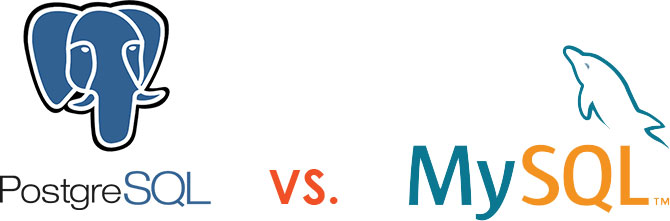

### Notes:

-   Despite the overwhelming popularity of MySQL, **PostgreSQL may be a
    better choice** because <span class="mark highlight-red">**its
    syntax most closely conforms to Standard SQL**</span>. This means
    that you can easily translate your skills to other database
    management systems such as MySQL or SQLite.

<!-- -->

-   when it comes to PostgreSQL vs MySQL, <span
    class="mark highlight-red">**the former is better at handling
    extraordinary database situations.**</span>

<!-- -->

-   PostgreSQL is a feature-rich database that can handle complex
    queries and massive databases.

<!-- -->

-   MySQL is a simpler database that’s fast, reliable, well understood,
    and easy to set up and manage.

<!-- -->

-   PostgreSQL is an object-relational database (ORDBMS) with features
    like table inheritance and function overloading, whereas MySQL is a
    pure relational database (RDBMS).

Most developers will tell you that
[MySQL](https://www.integrate.io/integrations/mysql/) is better for
websites and online transactions, while PostgreSQL is better for large
and complicated analytical processes. They’ll also note that
[PostgreSQL](https://www.integrate.io/integrations/postgresql/) comes
with “[a slew of great
features](https://pgdash.io/blog/postgres-features.html)” – like
extensibility and native NoSQL capabilities to help you deal with
challenging database circumstances.

Finally, they’ll remind you that MySQL is light on features so it can
focus on “[speed and
reliability](https://www.keycdn.com/blog/popular-databases)”.

|                                                                                                                                                                                                                | PostgreSQL                                                                                                                                                                                                                                                                                                                       | MySQL                                                                                                                                                                                                                                    |
|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Known as**                                                                                                                                                                                                   | The world’s most **advanced** open source database.                                                                                                                                                                                                                                                                              | The world’s most **popular** open source database.                                                                                                                                                                                       |
| **Development**                                                                                                                                                                                                | PostgreSQL is an open source **project**.                                                                                                                                                                                                                                                                                        | MySQL is an open-source **product**.                                                                                                                                                                                                     |
| **Pronunciation**                                                                                                                                                                                              | post gress queue ell                                                                                                                                                                                                                                                                                                             | my ess queue ell                                                                                                                                                                                                                         |
| **Licensing**                                                                                                                                                                                                  | MIT-style license                                                                                                                                                                                                                                                                                                                | GNU General Public License                                                                                                                                                                                                               |
| **Implementation programming language**                                                                                                                                                                        | C                                                                                                                                                                                                                                                                                                                                | C/C++                                                                                                                                                                                                                                    |
| **GUI tool**                                                                                                                                                                                                   | PgAdmin                                                                                                                                                                                                                                                                                                                          | MySQL Workbench                                                                                                                                                                                                                          |
| **ACID**                                                                                                                                                                                                       | Yes                                                                                                                                                                                                                                                                                                                              | Yes                                                                                                                                                                                                                                      |
| **Storage engine**                                                                                                                                                                                             | **Single** storage engine                                                                                                                                                                                                                                                                                                        | **Multiple** [storage engines](http://www.mysqltutorial.org/understand-mysql-table-types-innodb-myisam.aspx) e.g., InnoDB and MyISAM                                                                                                     |
| **Full-text search**                                                                                                                                                                                           | Yes                                                                                                                                                                                                                                                                                                                              | Yes (Limited)                                                                                                                                                                                                                            |
| **Drop a** **[temporary table](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-temporary-table/)**                                                                                           | No `TEMP` or `TEMPORARY` keyword in `DROP TABLE` statement                                                                                                                                                                                                                                                                       | Support the `TEMP` or `TEMPORARY` keyword in the `DROP TABLE` statement that allows you to remove the temporary table only.                                                                                                              |
| **[`DROP TABLE`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-drop-table/)**                                                                                                              | Support `CASCADE` option to drop table’s dependent objects e.g., tables and views.                                                                                                                                                                                                                                               | Does not support `CASCADE` option.                                                                                                                                                                                                       |
| **[](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-truncate-table/)[`TRUNCATE TABLE`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-truncate-table/)**                 | PostgreSQL `TRUNCATE TABLE` supports more features like `CASCADE`, `RESTART IDENTITY`, `CONTINUE IDENTITY`, transaction-safe, etc.                                                                                                                                                                                               | [MySQL](http://www.mysqltutorial.org/mysql-truncate-table/) [`TRUNCATE TABLE`](http://www.mysqltutorial.org/mysql-truncate-table/) does not support `CASCADE` and transaction safe i.e,. once data is deleted, it cannot be rolled back. |
| **Auto increment Column**                                                                                                                                                                                      | [`SERIAL`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-serial/)                                                                                                                                                                                                                                            | [`AUTO_INCREMENT`](http://www.mysqltutorial.org/mysql-sequence/)                                                                                                                                                                         |
| **[Identity Column](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-identity-column/)**                                                                                                      | Yes                                                                                                                                                                                                                                                                                                                              | No                                                                                                                                                                                                                                       |
| **Analytic functions**                                                                                                                                                                                         | Yes                                                                                                                                                                                                                                                                                                                              | No                                                                                                                                                                                                                                       |
| **[Data types](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-data-types/)**                                                                                                                | Support many advanced types such as [array](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-array/), [hstore](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-hstore/), and [user-defined type](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-user-defined-data-types/). | SQL-standard types                                                                                                                                                                                                                       |
| **Unsigned** **[integer](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-integer/)**                                                                                                         | No                                                                                                                                                                                                                                                                                                                               | Yes                                                                                                                                                                                                                                      |
| **[Boolean type](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-boolean/)**                                                                                                                 | Yes                                                                                                                                                                                                                                                                                                                              | Use `TINYINT(1)` internally for [Boolean](http://www.mysqltutorial.org/mysql-boolean/)                                                                                                                                                   |
| **IP address data type**                                                                                                                                                                                       | Yes                                                                                                                                                                                                                                                                                                                              | No                                                                                                                                                                                                                                       |
| **Set default value for a column**                                                                                                                                                                             | Support both constant and function call                                                                                                                                                                                                                                                                                          | Must be a constant or `CURRENT_TIMESTAMP` for `TIMESTAMP` or `DATETIME` columns                                                                                                                                                          |
| **[CTE](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-cte/)**                                                                                                                              | Yes                                                                                                                                                                                                                                                                                                                              | Yes (Supported [CTE](http://www.mysqltutorial.org/mysql-cte/) since MySQL 8.0)                                                                                                                                                           |
| **`EXPLAIN`** **output**                                                                                                                                                                                       | More detailed                                                                                                                                                                                                                                                                                                                    | Less detailed                                                                                                                                                                                                                            |
| **[Materialized views](https://www.postgresqltutorial.com/postgresql-materialized-views/)**                                                                                                                    | Yes                                                                                                                                                                                                                                                                                                                              | No                                                                                                                                                                                                                                       |
| **[CHECK constraint](https://www.postgresqltutorial.com/postgresql-check-constraint/)**                                                                                                                        | Yes                                                                                                                                                                                                                                                                                                                              | Yes (Supported since MySQL 8.0.16, Before that MySQL just ignored the [CHECK constraint](http://www.mysqltutorial.org/mysql-check-constraint/))                                                                                          |
| **Table inheritance**                                                                                                                                                                                          | Yes                                                                                                                                                                                                                                                                                                                              | No                                                                                                                                                                                                                                       |
| **Programming languages for** **[stored procedures](https://www.postgresqltutorial.com/postgresql-stored-procedures/)**                                                                                        | Ruby, Perl, Python, TCL, PL/pgSQL, SQL, JavaScript, etc.                                                                                                                                                                                                                                                                         | SQL:2003 syntax for [stored procedures](http://www.mysqltutorial.org/mysql-stored-procedure-tutorial.aspx)                                                                                                                               |
| **[](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-full-outer-join/)[`FULL OUTER JOIN`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-full-outer-join/)**              | Yes                                                                                                                                                                                                                                                                                                                              | No                                                                                                                                                                                                                                       |
| **[`INTERSECT`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-intersect/)**                                                                                                                | Yes                                                                                                                                                                                                                                                                                                                              | No                                                                                                                                                                                                                                       |
| **[](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-tutorial/postgresql-except/)[`EXCEPT`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-tutorial/postgresql-except/)** | Yes                                                                                                                                                                                                                                                                                                                              | No                                                                                                                                                                                                                                       |
| **Partial indexes**                                                                                                                                                                                            | Yes                                                                                                                                                                                                                                                                                                                              | No                                                                                                                                                                                                                                       |
| **Bitmap indexes**                                                                                                                                                                                             | Yes                                                                                                                                                                                                                                                                                                                              | No                                                                                                                                                                                                                                       |
| **Expression indexes**                                                                                                                                                                                         | Yes                                                                                                                                                                                                                                                                                                                              | No                                                                                                                                                                                                                                       |
| **Covering indexes**                                                                                                                                                                                           | Yes (since version 9.2)                                                                                                                                                                                                                                                                                                          | Yes. MySQL supports covering indexes that allow data to be retrieved by scanning the index alone without touching the table data. This is advantageous in case of large tables with millions of rows.                                    |
| **[Triggers](https://www.postgresqltutorial.com/postgresql-triggers/)**                                                                                                                                        | Support triggers that can fire on most types of command, except for ones affecting the database globally e.g., roles and tablespaces.                                                                                                                                                                                            | Limited to some commands                                                                                                                                                                                                                 |
| **Partitioning**                                                                                                                                                                                               | RANGE, LIST                                                                                                                                                                                                                                                                                                                      | RANGE, LIST, HASH, KEY, and composite partitioning using a combination of RANGE or LIST with HASH or KEY subpartitions                                                                                                                   |
| **Task Schedule**                                                                                                                                                                                              | pgAgent                                                                                                                                                                                                                                                                                                                          | [Scheduled event](http://www.mysqltutorial.org/mysql-triggers/working-mysql-scheduled-event/)                                                                                                                                            |
| **Connection Scalability**                                                                                                                                                                                     | Each new connection is an OS process                                                                                                                                                                                                                                                                                             | Each new connection is an OS thread                                                                                                                                                                                                      |




------------------------------------------------------------------------

------------------------------------------------------------------------

------------------------------------------------------------------------

------------------------------------------------------------------------

------------------------------------------------------------------------

------------------------------------------------------------------------

------------------------------------------------------------------------

------------------------------------------------------------------------

------------------------------------------------------------------------

------------------------------------------------------------------------

------------------------------------------------------------------------

------------------------------------------------------------------------

------------------------------------------------------------------------

------------------------------------------------------------------------








# Leetcode and CodeWars Queries

### **SQL Basics - Position**

-   Find the location of the comma in the column: characteristics

``` code
select 
    m.id, 
    m.name, 
    position(',' in m.characteristics) as comma
from monsters as m
order by comma;
```

|     |        |       |
|-----|--------|-------|
| id  | name   | comma |
| 8   | Random | 1     |
| 6   | Random | 2     |
| 1   | Cyril  | 4     |
| 5   | Martin | 4     |
| 7   | Random | 4     |
| 2   | Tiny   | 6     |
| 9   | Random | 8     |
| 4   | Umph   | 8     |
| 3   | Niall  | 9     |

### Create a function that checks if a number `n` is divisible by two numbers `x` **AND** `y`. All inputs are positive, non-zero numbers.

``` code
CREATE OR REPLACE FUNCTION is_divisible(n INTEGER, x INTEGER, y INTEGER)
RETURNS BOOLEAN AS $$
BEGIN
    IF n % x = 0 AND n % y = 0 THEN
        RETURN TRUE;
    ELSE
        RETURN FALSE;
    END IF;
END;
$$ LANGUAGE plpgsql;

SELECT id, is_divisible(n, x, y) as res
FROM kata;
```

|        |         |
|--------|---------|
| **id** | **res** |
| 1      | false   |
| 2      | true    |
| 3      | true    |
| 4      | false   |
| 5      | false   |

# \#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#

# Tutorial

# \#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#

# **Getting Started with PostgreSQL**

### Installation on Windows

<https://www.postgresqltutorial.com/postgresql-getting-started/install-postgresql/>

### Installation on Linux

<https://www.postgresqltutorial.com/postgresql-getting-started/install-postgresql-linux/>

## **What is PostgreSQL**

PostgreSQL is an advanced, entreprise-class open source relational
database system. It supports SQL and JSON.

Its a highly popular and stable database with over 20 years of
development by the open-source community.

It is used primarliy as a database for web application and analytics
application.

### **Common Use cases of PostgreSQL**

**1) A robust database in the LAPP stack**

LAPP stands for **L**inux, **A**pache, **P**ostgreSQL, and **P**HP(or
Python and Perl). PostgreSQL is primarily used as a robust back-end
database that powers many dynamic websites and web applications.

**2) General purpose transaction database**

Large corporations and startups alike use PostgreSQL as primary
databases to support their applications and products.

**3) Geospatial database**

PostgreSQL with the [PostGIS extension](https://postgis.net/) supports
geospatial databases for geographic information systems (GIS).

## Language support

PostgreSQL support most popular programming languages:

-   Python

<!-- -->

-   Java

<!-- -->

-   C\#

<!-- -->

-   C/C+

<!-- -->

-   Ruby

<!-- -->

-   JavaScript (Node.js)

<!-- -->

-   Perl

<!-- -->

-   Go

<!-- -->

-   Tcl









### **PostgreSQL feature highlights**

PostgreSQL has many advanced features that other enterprise-class
database management systems offer, such as:

-   User-defined types

<!-- -->

-   Table inheritance

<!-- -->

-   Sophisticated locking mechanism

<!-- -->

-   [Foreign key referential
    integrity](https://www.postgresqltutorial.com/postgresql-foreign-key/)

<!-- -->

-   [Views](https://www.postgresqltutorial.com/postgresql-views/),
    rules, [subquery](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-subquery/)

<!-- -->

-   Nested transactions (savepoints)

<!-- -->

-   Multi-version concurrency control (MVCC)

<!-- -->

-   Asynchronous replication

The recent versions of PostgreSQL support the following features:

-   Native Microsoft Windows Server version

<!-- -->

-   Tablespaces

<!-- -->

-   Point-in-time recovery

And more new features are added in each new release.

PostgreSQL is designed to be extensible. PostgreSQL allows you to define
your own data types, index types, functional languages, etc.

If you don’t like any part of the system, you can always develop a
custom plugin to enhance it to meet your requirements e.g., adding a new
optimizer.


### DVD Sample Data set

This is the Data set that we are going to use throughout the course.

<span class="image"></span>


### Load Data from the shell

The data is saved at: `C:\sampledb\dvdrental.tar`

Lets load it to Postgres using the cli shell.

-   First, launch the **psql** tool. press Enter to enter with the
    default values

<span class="image"></span>

-   Create database

``` code
postgres=# create database dvdrental;
```

-   Load the data using the pg_restore tool

``` code
pg_restore -U postgres -d dvdrental C:\sampledb\dvdrental.tar
```


### Load the DVD Rental database using the pgAdmin

The following shows you step by step on how to use the pgAdmin tool to
restore the [sample
database](https://www.postgresqltutorial.com/postgresql-sample-database/)
from the database file:

First, launch the **pgAdmin** tool and [connect to the PostgreSQL
server](https://www.postgresqltutorial.com/postgresql-python/connect/).

Second, right click the **Databases** and select the **Create \>
Database…** menu option:

![](attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/709982cd47985c2cb5c4abc9fd6b3920b168c56f.png)

Third, enter the database name `dvdrental` and click the **Save**
button:

![](attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/c8c203a80cd4bab6f885151a93eb47f00648cdd8.png)

You’ll see the new empty database created under the Databases node:

![](attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/703af7a17ddad5a125175e1a0e217d5e55e85b42.png)

Fourth, right-click on the **dvdrental** database and choose
**Restore…** menu item to restore the database from the downloaded
database file:

![](attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/b6bb60eac464d01854abcdf1bd03c460c7b1e8d6.png)

Fifth, enter the path to the sample database file e.g.,
**c:\\sampledb\\dvdrental.tar** and click the **Restore** button:

![](attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/d20be3e42dcfb81d94e8166feae18bb73d447d0e.png)

Sixth, the restoration process will complete in few seconds and shows
the following dialog once it completes:

![](attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/cd6701f2f72b8a2fa531aa29c772d3208b990a2e.png)

Finally, open the `dvdrental` database from object browser panel, you
will find tables in the `public` schema and other database objects as
shown in the following picture:

![](attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/e1f551eb7bcebeb59b093591679f106d402e79d9.png)

In this tutorial, you have learned how to load the `dvdrental` sample
database into the PostgreSQL database server for practicing PostgreSQL.

# **Section 1. Querying Data**

The `SELECT`statement has the following clauses:

-   Select distinct rows using
    [`DISTINCT`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-select-distinct/)
    operator.

<!-- -->

-   Sort rows
    using[`ORDER BY`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-order-by/)
    clause.

<!-- -->

-   Filter rows using
    [`WHERE`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-where/)
    clause.

<!-- -->

-   Select a subset of rows from a table using
    [`LIMIT`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-limit/)
    or
    [`FETCH`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-fetch/)
    clause.

<!-- -->

-   Group rows into groups using
    [`GROUP BY`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-group-by/)
    clause.

<!-- -->

-   Filter groups using
    [`HAVING`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-having/)
    clause.

<!-- -->

-   Join with other tables using
    [joins](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-joins/)
    such as
    [`INNER JOIN`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-inner-join/),
    [`LEFT JOIN`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-left-join/),
    [`FULL OUTER JOIN`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-full-outer-join/),
    [`CROSS JOIN`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-cross-join/)
    clauses.

<!-- -->

-   Perform set operations using
    [`UNION`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-union/),
    [`INTERSECT`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-intersect/),
    and
    [`EXCEPT`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-tutorial/postgresql-except/).

A select statement looks like this:

``` code
select *
from actor
limit 5;
```

``` code
"actor_id" "first_name"  "last_name"   "last_update"
1   "Penelope"    "Guiness" "2013-05-26 14:47:57.62"
2   "Nick"    "Wahlberg"    "2013-05-26 14:47:57.62"
3   "Ed"  "Chase"   "2013-05-26 14:47:57.62"
4   "Jennifer"    "Davis"   "2013-05-26 14:47:57.62"
5   "Johnny"  "Lollobrigida"    "2013-05-26 14:47:57.62"
```

-   Concatenate Strings

``` code
select first_name || ' ' || last_name as Full_Name
from actor
```

``` code
"full_name"
"Penelope Guiness"
"Nick Wahlberg"
"Ed Chase"
"Jennifer Davis"
"Johnny Lollobrigida"
```

-   alias

``` code
select first_name as Name
from actor

# OR

select first_name Name
from actor
```

-   order by

``` code
-- Order by ASC
select first_name Name
from actor
order by Name

-- Order by DESC
select first_name Name
from actor
order by Name desc

-- Order by an aggregated column
select 
    first_name Name,
    length(first_name) Length
from actor
order by Length desc

-- Order by with NULLS last
SELECT num
FROM sort_demo
ORDER BY num NULLS LAST;

-- Order by with NULLS first
SELECT num
FROM sort_demo
ORDER BY num NULLS First;
```

-   Distinct

``` code
-- Distinct based on first_name
select distinct first_name
from actor

-- Distinct based on both first_name and last_name
select distinct first_name, last_name
from actor

-- Distinct based on only the last_name(The first name can have duplicates)
select 
    distinct on (last_name) last_name,
    first_name
from actor
```


# **Section 2. Filtering Data**

Looks like the where clause works exatcly like MySQL. same as with IN,
LIKE, BETWEEN, AND, OR

## Limit

-   Syntax:

``` code
SELECT select_list 
FROM table_name
ORDER BY sort_expression
LIMIT row_count

# OR 

SELECT select_list
FROM table_name
LIMIT row_count OFFSET row_to_skip;
```

-   Examples

``` code
-- Query the first 5 rows
select *
from actor
limit 5 

-- Query the first 5 rows, starting from row number 10
select *
from actor
limit 5 offset 10
```

``` code
"actor_id"  "first_name"  "last_name"   "last_update"
11  "Zero"    "Cage"    "2013-05-26 14:47:57.62"
12  "Karl"    "Berry"   "2013-05-26 14:47:57.62"
13  "Uma" "Wood"    "2013-05-26 14:47:57.62"
14  "Vivien"  "Bergen"  "2013-05-26 14:47:57.62"
15  "Cuba"    "Olivier" "2013-05-26 14:47:57.62"
```

## Fetch

Works the same as LIMIT. I dont think I should use it, the only downside
to Limit is that it is not SQL standard. So if I want to migrate my code
from Potgres to other databases i should use fetch.

Nevetheless, the syntax looks like this

``` code
-- Query the first 5 rows, starting from row number 10
select *
from actor
offset 10
fetch first 5 rows only;
```

``` code
"actor_id" "first_name"  "last_name"   "last_update"
11  "Zero"    "Cage"    "2013-05-26 14:47:57.62"
12  "Karl"    "Berry"   "2013-05-26 14:47:57.62"
13  "Uma" "Wood"    "2013-05-26 14:47:57.62"
14  "Vivien"  "Bergen"  "2013-05-26 14:47:57.62"
15  "Cuba"    "Olivier" "2013-05-26 14:47:57.62"
```


# **Section 3. Joining Multiple Tables**

<span class="image"></span>

``` code
CREATE TABLE basket_a (
    a INT PRIMARY KEY,
    fruit_a VARCHAR (100) NOT NULL
);

CREATE TABLE basket_b (
    b INT PRIMARY KEY,
    fruit_b VARCHAR (100) NOT NULL
);

INSERT INTO basket_a (a, fruit_a)
VALUES
    (1, 'Apple'),
    (2, 'Orange'),
    (3, 'Banana'),
    (4, 'Cucumber');

INSERT INTO basket_b (b, fruit_b)
VALUES
    (1, 'Orange'),
    (2, 'Apple'),
    (3, 'Watermelon'),
    (4, 'Pear');
```

PostgreSQL supports:

## [inner join](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-inner-join/)

<span class="image"></span>

``` code
-- Return rows that have the same fruit in both columns
select *
from basket_a as a
inner join basket_b as b
on a.fruit_a = b.fruit_b
```

<span class="image"></span>

## [left join](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-left-join/)(Acts as a Left Outer Join)

<span class="image"></span>

``` code
-- Return all rows from the left table, regardless if there are matches in the right table
select *
from basket_a as a
left join basket_b as b
on a.fruit_a = b.fruit_b
```

<span class="image"></span>

## Left Join(only rows from the left table)

<span class="image"></span>

``` code
-- Return only rows from the left table that dont have a match in the right table
select *
from basket_a as a
left join basket_b as b
on a.fruit_a = b.fruit_b
where b.fruit_b is null;
```

<span class="image"></span>

## [right join](https://www.postgresqltutorial.com/postgresql-right-join/)(Acts as a Right Outer Join)

<span class="image"></span>

``` code
-- Return all rows from the right table, regardless if there are matches in the left table
select *
from basket_a as a
right join basket_b as b
on a.fruit_a = b.fruit_b;
```

<span class="image"></span>

## Right Join(only rows from the right table)

<span class="image"></span>

``` code
-- Return only rows from the right table that dont have a match in the left table
select *
from basket_a as a
left join basket_b as b
on a.fruit_a = b.fruit_b
where b.fruit_b is null;
```

<span class="image"></span>

## [full outer join](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-full-outer-join/)

<span class="image"></span>

``` code
-- Return all rows from both tables, regardless if there are matches
select *
from basket_a as a
full join basket_b as b
on a.fruit_a = b.fruit_b;
```

<span class="image"></span>

## Full Outer Join(only unique rows to both tables)

<span class="image"></span>

``` code
-- Return only rows unique to either tables
select *
from basket_a as a
full join basket_b as b
on a.fruit_a = b.fruit_b
where 
    a.fruit_a is null or
    b.fruit_b is null;
```

<span class="image"></span>

## [cross join](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-cross-join/)

A `CROSS JOIN` clause allows you to produce a Cartesian Product of rows
in two or more tables.

``` code
-- Return all combinations of rows from both tables
select *
from basket_a as a
cross join basket_b as b
```

<span class="image"></span>

## [natural join](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-natural-join/)

A natural join is a join that creates an implicit join based on the same
column names in the joined tables.

``` code
SELECT * FROM products
NATURAL JOIN categories;
```

<span class="image"></span>

``` code
SELECT  * FROM products
INNER JOIN categories USING (category_id);
```

## Set Operations

### Unions

<span class="image"></span>

Combine the result sets of two or more select queries

``` code
select *
from basket_a as a

union

select *
from basket_b as b;
```

<span class="image"></span>

The `UNION` operator removes all duplicate rows from the combined data
set. To retain the duplicate rows, you use the the `UNION ALL` instead.

``` code
select *
from basket_a as a

union all

select *
from basket_b as b;
```

### **INTERSECT**

<span class="image"></span>

Same as `Union`, the PostgreSQL `INTERSECT `operator combines result
sets of two or more
[SELECT](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-select/)
statements into a single result set.

The `INTERSECT` operator returns any rows that are available in both
result sets.

For Example:

The `top_rated_films` table:

![](attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/1944a9c2560d69270a477b735f2ebfb0fc2d2f28.png)

The `most_popular_films` table:

![](attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/ac2e548608e8978b6833dfc53334c828d8bee99e.png)

To get popular films which are also top rated films, you use the
`INTERSECT` operator as follows:

``` code
SELECT *
FROM most_popular_films

INTERSECT

SELECT *
FROM top_rated_films;
```

![](attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/cbd302cc7be4427ea04cb7712535cfc35edf7b92.png)

### Except

<span class="image"></span>

return the rows in the first query that does not appear in the output of
the second query.

The `top_rated_films` table:

![](attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/1944a9c2560d69270a477b735f2ebfb0fc2d2f28.png)

The `most_popular_films` table:

![](attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/ac2e548608e8978b6833dfc53334c828d8bee99e.png)

The following statement uses the `EXCEPT` operator to find the top-rated
films that are not popular:

``` code
SELECT * FROM top_rated_films

EXCEPT

SELECT * FROM most_popular_films;
```

![](attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/d9e5a06c004269ea9ecc3ea07e9711ed2c35a8b0.png)




# **Section 6. Grouping sets, Cube, and Rollup**

## grouping sets

Postgres has a feature called grouping sets that allows us to choose
multiple sets of group by clauses inside a single query.

``` code
-- Return with the multiple groupings.
-- ORder by the most appearances
select 
    first_name,
    last_name,
    count(*) Appearances
from actor
group by 
    grouping sets
        (   
            (first_name),
            (last_name),
            (first_name, last_name)
         )
order by count(*) desc
limit 10;
```

<span class="image"></span>

Looks like the combination that has the most appearances is the
last_name = Kilmer. There are 5 rows with that last name.

There are 4 rows with the first name as Kenneth.

Lets look for rows where the combination of (first_name, last_name) is
less than 2:

``` code
-- Return with the multiple groupings.
-- ORder by the most appearances
select 
    first_name,
    last_name,
    count(*) Appearances
from actor
group by 
    grouping sets
        (   
            (first_name),
            (last_name),
            (first_name, last_name)
         )
having grouping (first_name, last_name) < 2
```

Explanation:

This query is like a combination of three separate group by queries
combined into one output.

``` code
select 
    first_name,
        last_name
    count(*) Appearances
from actor
group by 
    first_name,
    last_name


select 
    first_name,
    count(*) Appearances
from actor
group by 
    first_name


select 
    last_name,
    count(*) Appearances
from actor
group by 
    last_name
```

## Cube

define multiple grouping sets that include all possible combinations of
dimensions.

In other words, this query:

``` code
select 
    first_name,
    last_name,
    count(*)
from actor
group by 
    cube
        (first_name, last_name)
```

is the same as this:

``` code
select 
    first_name,
    last_name,
    count(*) Appearances
from actor
group by 
    grouping sets
        (   
            (),
            (first_name),
            (last_name),
            (first_name, last_name)
         )
```

Cube is like grouping sets by all possible combinations of columns.

## Rollup

generate reports that contain totals and subtotals. Different from the
[`CUBE`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-cube/)
subclause, `ROLLUP` does not generate all possible grouping sets based
on the specified columns. It just makes a subset of those.

It doesnt creat all possible combination of columns, it starts from
`()`, than adds one column`(first name)`, than adds another
`(first name, last name)` and so on.

Instead of cube, that would start from `()`, than `first_name`, than
`last_name`, than `(first_name, last_name)`.

In other words, this query:

``` code
select 
    first_name,
    last_name,
    count(*)
from actor
group by 
    roll up
        (first_name, last_name)
```

is the same as this:

``` code
select 
    first_name,
    last_name,
    count(*) Appearances
from actor
group by 
    grouping sets
        (   
            (),
            (first_name),
            (first_name, last_name)
         )
```


# **Section 7. Subquery**

Subquery, Any, All, Exists are all the same as MySQL

-   [Subquery](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-subquery/)
    – write a query nested inside another query.

<!-- -->

-   [ANY](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-any/)
    – retrieve data by comparing a value with a set of values returned
    by a subquery.

<!-- -->

-   [ALL](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-all/)
    – query data by comparing a value with a list of values returned by
    a subquery.

<!-- -->

-   [EXISTS](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-exists/)
    – check for the existence of rows returned by a subquery.




# **Section 8. Common Table Expressions**

CTE and Recursive CTE are the same as MySQL

-   [PostgreSQL
    CTE](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-cte/)
    – introduce you to PostgreSQL common table expressions or CTEs.

<!-- -->

-   [Recursive query using
    CTEs](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-recursive-query/)
    – discuss the recursive query and learn how to apply it in various
    contexts.



# **Section 9. Modifying Data**

### [Insert](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-insert/)

In PostgreSQL we can insert data and also retrieve the information of
the inserted row.

``` code
# Regualr Insert
INSERT INTO public.actor(
    actor_id, first_name, last_name, last_update)
    VALUES (9999, 'Bar', 'Dadon', (select current_date));


# Insert and Return the row
INSERT INTO public.actor(
    actor_id, first_name, last_name, last_update)
    VALUES (99999, 'Bar', 'Dadon', (select current_date))
RETURNING *;
```

<span class="image"></span>

### on conflict (column) do

We can give PostgreSQL instructions on what to do when there’s a
conflict. For example, lets insert a record that already exist.

This insert will raise an error because that actor_id already exists, so
im telling PostgreSQL that if there’s a conflict on the actor_id column,
don't do anything

``` code
INSERT INTO public.actor(
actor_id, first_name, last_name, last_update)
VALUES 
        (1115, 'Bar', 'Dadon', (select current_date))
on conflict (actor_id)
do 
    nothing;
```

Another example, when inserting an actor that already exist, instead of
throwing an error, update the first, last name and last update date of
the actor.

``` code
-- The current actor is this:
select *
from actor
where actor_id in (1115
```

<span class="image"></span>

``` code
-- Update the first, last name and last update date of actors that already exist
INSERT INTO public.actor(
actor_id, first_name, last_name, last_update)
VALUES 
        (1115, 'Bar', 'Dadon', (select current_date))
on conflict (actor_id)
do 
    update set 
        first_name = excluded.first_name, 
        last_name = excluded.last_name,
        last_update = excluded.last_update
```

Lets check the actor again:

``` code
select *
from actor
where actor_id in (1115)
```

<span class="image"></span>

So instead of throwing an error, PostgreSQL simply updated the fields of
the existing row.

-   [Insert multiple
    rows](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-insert-multiple-rows/)
    – show you how to insert multiple rows into a table.

``` code
# Regualr multiple Insert
INSERT INTO public.actor(
actor_id, first_name, last_name, last_update)
VALUES 
        (1111, 'Bar', 'Dadon', (select current_date)),
        (1112, 'Bar', 'Dadon', (select current_date)),
        (1113, 'Bar', 'Dadon', (select current_date));


# Insert multiple rows and Return them
INSERT INTO public.actor(
actor_id, first_name, last_name, last_update)
VALUES 
        (1114, 'Bar', 'Dadon', (select current_date)),
        (1115, 'Bar', 'Dadon', (select current_date)),
        (1116, 'Bar', 'Dadon', (select current_date))
RETURNING *;
```

<span class="image"></span>

-   [Update](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-update/)
    – update existing data in a table.

``` code
-- Regualr update
update actor
set first_name = 'Yuval'
where actor_id = 1114;

-- Regualr update and return the row
update actor
set first_name = 'Yuval'
where actor_id = 1114
RETURNING *;

----------------------------------------------------------------

-- Regular multiple updates
update actor
set first_name = 'Yuval', last_name = 'Something'
where actor_id = 1114;

-- Regular multiple updates and returning the rows
update actor
set first_name = 'Yuval', last_name = 'Something'
where actor_id = 1114
RETURNING *;
```

<span class="image"></span>

-   [Update
    join](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-update-join/)
    – update values in a table based on values in another table.

<!-- -->

-   [Delete](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-delete/)
    – delete data in a table.

``` code
delete from actor
where actor_id = 1114
RETURNING *;
```

<span class="image"></span>

-   [Upsert](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-upsert/)
    – insert or update data if the new row already exists in the table.





# **Section 10. Transactions**

[PostgreSQL
Transactions](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-transaction/)
– show you how to handle transactions in PostgreSQL using BEGIN, COMMIT,
and ROLLBACK statements.

A PostgreSQL transaction is atomic, consistent, isolated, and durable.
These properties are often referred to as ACID:

-   Atomicity guarantees that the transaction completes in an
    all-or-nothing manner.

<!-- -->

-   Consistency ensures the change to data written to the database must
    be valid and follow predefined rules.

<!-- -->

-   Isolation determines how transaction integrity is visible to other
    transactions.

<!-- -->

-   Durability makes sure that transactions that have been committed
    will be stored in the database permanently.

## Basic Syntax

To start a transaction use `begin transaction` or just `begin`

``` code
begin transaction;

    -- Delete rows with Dadon
    delete from actor
    where last_name = 'Dadon';
    
    -- Insert the actor Bar Dadon
    insert into actor
    (actor_id, first_name, last_name, last_update)
    values
    (1115, 'Bar', 'Dadon', (select CURRENT_DATE));

    -- Update the last name of Bar Dadon
    update actor
    set last_name = 'Not Dadon'
    where last_name = 'Dadon';

commit;
end;
```

## Rolling back

``` code
begin transaction;

    -- Delete rows with Dadon
    delete from actor
    where last_name in ('Dadon', 'Not Dadon');
    
    -- Insert the actor Bar Dadon
    insert into actor
    (actor_id, first_name, last_name, last_update)
    values
    (1115, 'Bar', 'Dadon', (select CURRENT_DATE));

    -- Update the last name of Bar Dadon
    update actor
    set last_name = 'Not Dadon'
    where last_name = 'Dadon';

rollback;
end;
```


# **Section 11. Import & Export Data**

## **Import CSV File Into PostgreSQL Table**

Before importing a csv file into a table we need to create it first.

``` code
CREATE TABLE persons (
  id SERIAL,
  first_name VARCHAR(50),
  last_name VARCHAR(50),
  dob DATE,
  email VARCHAR(255),
  PRIMARY KEY (id)
)
```

I saved a csv file in the location: `C:\sampledb\persons.csv`

``` code
COPY persons(first_name, last_name, dob, email)
FROM 'C:\sampledb\persons.csv'
DELIMITER ','
CSV HEADER;
```

That’s it. Lets verify it:

``` code
select *
from persons;
```

<span class="image"></span>

## Import CSV file into a table using pgAdmin

In case you need to import a CSV file from your computer into a table on
the PostgreSQL database server, you can use the pgAdmin.

The following statement
[truncates](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-truncate-table/)
the `persons` table so that you can re-import the data.

``` code
TRUNCATE TABLE persons
RESTART IDENTITY;
Code language: SQL (Structured Query Language) (sql)
```

First, right-click the `persons` table and select the **Import/Export…**
menu item:

![](attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/98352559edb51103f20fde0ae001a6e352974b90.png)

Second, (1) switch to import, (2) browse to the import file, (3) select
the format as CSV, (4) select the delimiter as comma (`,`):

![](attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/652d8b87ecffd921fdc173350425c88bd6979fd4.png)

Third, click the columns tab, uncheck the id column, and click the OK
button:

![](attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/68965882e21b101b01dd9a0601dae33934f3f862.png)

Finally, wait for the import process to complete. The following shows
the dialog that inform you the progress of the import:

![](attachment:vertopal_7cb4bd6a5729423badfa2725c4d9b20d/890f36de965c01276d6f114e6e82c76164aaf434.png)

## **Export PostgreSQL Table To CSV File**

Lets export this table:

``` code
select *
from persons;
```

<span class="image"></span>

ill save this file in: `C:\tmp\persons_db.csv`

``` code
COPY persons 
TO 'C:\tmp\persons_db.csv' 
DELIMITER ',' 
CSV HEADER;
```

<span class="image"></span>

We also can export only specific columns:

``` code
COPY persons (first_name,last_name)
TO 'C:\tmp\persons_db_names.csv' 
DELIMITER ',' 
CSV HEADER;
```

Or export without headers

``` code
COPY persons (first_name,last_name)
TO 'C:\tmp\persons_db_names.csv' 
DELIMITER ',' 
CSV;
```

## Export data from a table to CSV file using the `\copy` command

In case you have the access to a remote PostgreSQL database server, but
you don’t have sufficient privileges to write to a file on it, you can
use the PostgreSQL built-in command `\copy`.

The `\copy` command basically runs the `COPY `statement above. However,
instead of server writing the CSV file, psql writes the CSV file,
transfers data from the server to your local file system. To use `\copy`
command, you just need to have sufficient privileges to your local
machine. It does not require PostgreSQL superuser privileges.

For example, if you want to export all data of the `persons` table into
`persons_client.csv` file, you can execute the `\copy` command from the
psql client as follows:

``` code
\copy (SELECT * FROM persons) to 'C:\tmp\persons_client.csv' with csv
```


# Section 15. Conditional Expressions & Operators

-   [`CASE`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-case/) –
    show you how to form conditional queries with `CASE` expression.

<!-- -->

-   [`COALESCE`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-coalesce/) –
    return the first non-null argument. You can use it to
    substitute `NULL` by a default value.

<!-- -->

-   [`NULLIF`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-nullif/) –
    return `NULL` if the first argument equals the second one.

<!-- -->

-   [`CAST`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-cast/) –
    convert from one data type into another e.g., from a string into an
    integer, from a string into a date.





# **PostgreSQL EXPLAIN**

<https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-explain/>

# Advanced PostgreSQL Tutorial

# **PostgreSQL PL/pgSQL**

<https://www.postgresqltutorial.com/postgresql-plpgsql/>

So it turns out that Postgres is actually really good for analytics.
Much better than MySQL actually. One of the reasons is PL/PgSQL.

Postgres has a procedural language that is similar to Pl/SQL

PL/pgSQL procedural language is similar to the [Oracle
PL/SQL](https://www.oracletutorial.com/plsql-tutorial/). The following
are reasons to learn PL/pgSQL:

-   PL/pgSQL is easy to learn and simple to use.

<!-- -->

-   PL/pgSQL comes with PostgreSQL by default. The user-defined
    functions and stored procedures developed in PL/pgSQL can be used
    like any built-in functions and stored procedures.

<!-- -->

-   PL/pgSQL inherits all user-defined types, functions, and operators.

<!-- -->

-   PL/pgSQL has many features that allow you to develop complex
    functions and stored procedures.

<!-- -->

-   PL/pgSQL can be defined to be trusted by the PostgreSQL database
    server.

# **Section 1. Getting started**

## **Introduction to PostgreSQL PL/pgSQL**

PL/pgSQL allows you to extend the functionality of PostgreSQL database
server by creating objects with complex logic, such as: User-defined
functions, stored procedures, triggers.

PL/pgSQL has if, case and loop statements and Inherit all user-defined
functions, operators, and types.

PL/pgSQL wraps multiple statements in an object and store it on the
PostgreSQL database server.

Instead of wiriting normal scripts, whereby Postgrs will grab each
command go to the disk, pull the data and retireive it. WE can wrap
multiple commands in a single script and send it to the server.

This reduces the number of round trips between the application and the
PostgreSQL database server.

and it avoid transferring the immediate results between the application
and the server.

## **Dollar-Quoted String Constants**

Postgres has a feature similar to format in Python.

``` code
select 'hi'

select $$ hi $$;

-- Adding a tag: message
select $message$ hi $message$
```

Adding the \$\$ is useful because we can escape characters with it, This
is a really useful feature when building stored procedures, for example:

Lets say that i want to create a stored procedure that counts the number
of actors that don't have a last name that is equal to Dadon, and print
it.

To do that we need to write the procedure for it, and wrap it in ‘ ’.

``` code
do
'declare 
    counter INTEGER;
begin

    select count(*)
    into counter
    from actor
    where last_name != 'Dadon'; ----> ERROR:  syntax error at or near "Dadon"
    
    raise notice 'The number of not Dadons is: %', counter;
    
end;';
```

In this case ill get an error if ill run it because ‘Dadon’ is already
in ‘ ’.

No worries all we need to do is wrap Dadon in \$\$ signs:

``` code
do
'declare 
    counter INTEGER;
begin

    select count(*)
    into counter
    from actor
    where last_name != $$Dadon$$;
    
    raise notice 'The number of not Dadons is: %', counter; ---> syntax error at or near "The"
    
end;';
```

Now i get another error, there’s another string in the script, lets also
wrap that one:

``` code
do
'declare 
    counter INTEGER;
begin

    select count(*)
    into counter
    from actor
    where last_name != $$Dadon$$;
    
    raise notice $$The number of not Dadons is: %$$, counter;
    
end;';
```

Great now its working. This is pretty unconfortable to go over all of
the strings in the script and escape them manually, instead, we can just
escape the entire script with \$\$:

``` code
do
$$
declare 
    counter INTEGER;
begin

    select count(*)
    into counter
    from actor
    where last_name != 'Dadon';
    
    raise notice 'The number of not Dadons is: %', counter;
    
end;
$$
```

Same idea in functions:

``` code
-- Instead of this:
create function find_film_by_id(
   id int
) returns film 
language sql
as 
  'select * from film 
   where film_id = id';


--- Do this:
create function find_film_by_id(
   id int
) returns film 
language sql
as 
$$
  select * from film 
  where film_id = id;  
$$;
```

And with stored procedures:

``` code
create procedure proc_name(param_list)
language lang_name
as $$
  -- stored procedure body
$$
```

## **PL/pgSQL Block Structure**

PL/pgSQL is a block-structured lanugage, each object such as stored
procedures and functions are organized into blocks.

The syntax looks like this:

``` code
[ <<label>> ]
[ declare
    declarations ]
begin
    statements;
    ...
end [ label ];
```

-   We can give names or labels to procedures

<!-- -->

-   We start by decalring the variables and their data types

<!-- -->

-   Then begin a transaction with some logic in it

<!-- -->

-   And we end the procedures with the same label as at the start

<!-- -->

-   Dont forget to escape the entire thing with \$\$

Example:

``` code
do $$
<<MyFirstProcedure>> 
declare 
    counter INTEGER;
begin

    select count(*)
    into counter
    from actor
    where last_name != 'Dadon';
    
    raise notice 'The number of not Dadons is: %', counter;
    
end MyFirstProcedure $$;
```





# **Section 2. Variables & constants**

## **PL/pgSQL Variables**

In PL/pgSQL we can save variables using this syntax:

``` code
variable_name data_type [:= expression];
```

We can initialize a variable by declaring it in a procedure and give it
a value:

``` code
do $$ 
declare
   counter    integer := 1;
   first_name varchar(50) := 'John';
   last_name  varchar(50) := 'Doe';
   payment    numeric(11,2) := 20.5;
begin 
   raise notice '% % % has been paid % USD', 
       counter, 
       first_name, 
       last_name, 
       payment;
end $$;
```

Example, using a variable to measure the execution time:

``` code
do $$
declare
    star_wars_movies integer;
    timer time := now();
    start_time time;
    end_time time;
begin

    
    select timer
    into start_time;
    
    select count(*)
    into star_wars_movies
    from film as f
    where lower(f.title) like '%wars%';
    
    raise notice 'The number of Wars movies is: %', star_wars_movies;

    select timer
    into end_time;
    
    raise notice 'The execution time is: %', (end_time - start_time);
    
end $$;
```

### **Copying data types**

If you are not sure what the data types ofa variable should be, simply
copy it from an existing variable in a table.

Here im creating a variable called `movie_name`, but im not sure what
type it should be, all i know is that it should be the same as the type
of the column: `actor.title`

``` code
do $$
<<MyFirstProcedure>> 
declare 
    movie_name film.title%type;
begin

    select title
    into movie_name
    from film
    where title like '%War%'
    limit 1;
    
    raise notice 'The name of the first War movie is: %', movie_name;
    
end MyFirstProcedure $$;
```

### Declare in a Declare

Unlike Pl SQL we can actually create declare statements inside declare
statements:

``` code
do $$ 
<<outer_block>>
declare
  counter integer := 0;
begin
   counter := counter + 1;
   raise notice 'The current value of the counter is %', counter;

   declare
       counter integer := 0;
   begin
       counter := counter + 10;
       raise notice 'Counter in the subblock is %', counter;
       raise notice 'Counter in the outer block is %', outer_block.counter;
   end;

   raise notice 'Counter in the outer block is %', counter;
   
end outer_block $$;
```

# **Section 3. Reporting messages and errors**

## Raise

To raise a message in postgres, use the `raise ` statement:

-   Syntax:

``` code
raise level format;
```

-   The `level` can be any of these:
    -   `debug`

    <!-- -->

    -   `log`

    <!-- -->

    -   `notice`

    <!-- -->

    -   `info`

    <!-- -->

    -   `warning`

    <!-- -->

    -   `exception` - Default

<!-- -->

-   The `format ` is a string message

To raise an error use the `raise exception` level. After rasing an
exception, it is best practice to add some information using the syntax:

``` code
using option = expression
```

-   The `option `can be any of these:
    -   `message`: set error message

    <!-- -->

    -   `hint`: provide the hint message so that the root cause of the
        error is easier to be discovered.

    <!-- -->

    -   `detail`: give detailed information about the error.

    <!-- -->

    -   `errcode`: identify the error code, which can be either by
        condition name or directly five-character `SQLSTATE` code.
        Please refer to the [table of error codes and condition
        names](https://www.postgresql.org/docs/current/static/errcodes-appendix.html).

For example, if there’s a duplicate email, raise an exception that says
“duplicate email” plus the email itself.

Also, add an option of type “hint”, that says “check the email again”.

``` code
do $$ 
declare
  email varchar(255) := 'info@postgresqltutorial.com';
begin 

-- Some logic about checking duplicate emails --

  raise exception 'duplicate email: %', email 
        using hint = 'check the email again';
end $$;
```

To give further invormation we can `raise sqlstate` and error codes:

[table of error codes and condition
names](https://www.postgresql.org/docs/current/static/errcodes-appendix.html):

``` code
-- Example #1 - raise sqlstate
do $$ 
begin 
    --...
    raise sqlstate '2210b';
end $$;

-- Example #2 - raise errorcode
do $$ 
begin 
    --...
    raise invalid_regular_expression;
end $$;
```

## Assert

The `assert` statement is a useful shorthand for inserting debugging
checks into PL/pgSQL code.

-   Syntax:

``` code
assert condition [, message];
```

### 1) condition

The `condition` is a Boolean expression that is expected to always
return `true`.

If the `condition` evaluates to `true`, the `assert` statement does
nothing.

In case the `condition` evaluates to `false` or `null`, PostgreSQL
raises an `assert_failure` exception.

### 2) message

The message is optional.

If you don’t pass the `message`, PostgreSQL uses the
“`assertion failed`” message by default. In case you pass the `message`
to the `assert` statement, it will use it to replace the default
message.

For example, This script will count the films into a variable, and
assert that the number if bigger than 0, otherwise, it will issue an
error.

``` code
do $$
declare 
   film_count integer;
begin
   select count(*)
   into film_count
   from film;
   
   assert film_count > 0, 'Film not found, check the film table';
end$$;
```


# <ins>__PostgreSQL Administration__<ins>

<https://www.postgresqltutorial.com/postgresql-administration/>

# **Section 1. Managing Databases**

## Create Database

-   Syntax:

``` code
CREATE DATABASE database_name
WITH
   [OWNER =  role_name]
   [TEMPLATE = template]
   [ENCODING = encoding]
   [LC_COLLATE = collate]
   [LC_CTYPE = ctype]
   [TABLESPACE = tablespace_name]
   [ALLOW_CONNECTIONS = true | false]
   [CONNECTION LIMIT = max_concurrent_connection]
   [IS_TEMPLATE = true | false ]
```

<span style="border-bottom:0.05em solid">**Explanation about the
options**</span>

**OWNER**

-   Set the owner of the database

<!-- -->

-   The default owner is the role you used to create the database

**TEMPLATE**

Specify the template database from which the new database is created. By
default, PostgreSQL uses the `template1` database as the template
database if you don’t explicitly specify the template database.

**ENCODING**

Determine the character set encoding in the new database.

**LC_COLLATE**

Specify the collation order (`LC_COLLATE`) that the new database will
use. This parameter affects the sort order of string in the queries that
contain the
[`ORDER BY`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-order-by/)
clause. It defaults to the `LC_COLLATE` of the template database.

**LC_CTYPE**

Specify the character classification that the new database will use. It
affects the classification of character e.g., lower, upper, and digit.
It defaults to the `LC_CTYPE` of the template database

**TABLESPACE**

Specify the
[tablespace](https://www.postgresqltutorial.com/postgresql-create-tablespace/)
name for the new database. The default is the tablespace of the template
database.

**CONNECTION LIMIT**

Specify the maximum concurrent connections to the new database. The
default is -1 i.e., unlimited. This parameter is useful in the shared
hosting environments where you can configure the maximum concurrent
connections for a particular database.

**ALLOW_CONNECTIONS**

The `allow_connections` parameter is a boolean value. If it is `false`,
you cannot connect to the database.

**TABLESPACE**

Specify the
[tablespace](https://www.postgresqltutorial.com/postgresql-create-tablespace/)
that the new database will use. It defaults to the tablespace of the
template database.

**IS_TEMPLATE**

If the `IS_TEMPLATE` is true, any user with the `CREATEDB` privilege can
clone it. If false, only superusers or the database owner can clone it.

-   Only roles with `CREATEDB` permission can create a new database.

Examples

``` code
-- Example #1 - Simple create database 
CREATE DATABASE sales;

-- Example #2 - encode with UTF8, set the owner of the db to be the HR role
CREATE DATABASE hr 
WITH 
   ENCODING = 'UTF8'
   OWNER = hr
   CONNECTION LIMIT = 100;
```


## Alter Database

### **Changing attributes of a database**

-   Syntax

``` code
ALTER DATABASE name WITH option;
```

The option can be:

-   `IS_TEMPLATE`

<!-- -->

-   `CONNECTION LIMIT`

<!-- -->

-   `ALLOW_CONNECTIONS`

### **Rename the database**

-   Syntax

``` code
ALTER DATABASE database_name
RENAME TO new_name;

-- Example
ALTER DATABASE testdb2 
RENAME TO testhrdb;
```

-   To Rename a database we need to follow these steps:
    1.  Disconnect from the database that you want to rename and connect
        to a different database.

    <!-- -->

    1.  Check and terminate all active connections to the database that
        you want to rename.

    <!-- -->

    1.  Use the
        [`ALTER DATABASE`](https://www.postgresqltutorial.com/postgresql-alter-database/)
        statement to rename the database to the new one.

<!-- -->

-   For example:

    ``` code
    drop database if exists test;
    create database test;
    ```

    ``` code
    -- Step .1 - Connect to postgres(by connecting to postgres you disconnect from the current database)
    db=# \connect postgres

    -- Step .2 - Check current connections to the DB
    SELECT  *
    FROM pg_stat_activity
    WHERE datname = 'test';

    -- Terminate all connections to 'test'
    SELECT
        pg_terminate_backend (pid)
    FROM
        pg_stat_activity
    WHERE
        datname = 'test';

    -- Step .3 - Rename the database
    alter database test
    rename to renamed_test;
    ```

### **Change the owner of the database**

-   Syntax

``` code
ALTER DATABASE database_name
OWNER TO new_owner | current_user | session_user;

-- Example
ALTER DATABASE testhrdb 
OWNER TO hr;
```

-   If the role does not exist, create it.

    ``` code
    CREATE ROLE hr
    LOGIN 
    CREATEDB
    PASSWORD 'securePa$$1';
    ```

### **Change the default tablespace of a database**

``` code
ALTER DATABASE database_name
SET TABLESPACE new_tablespace;

-- Example
ALTER DATABASE testhrdb
SET TABLESPACE hr_default;
```

-   If the tablespace does not exist, create it.

    ``` code
    CREATE TABLESPACE hr_default
    OWNER hr
    LOCATION 'C:\\sampledb\\hr';
    ```

### **Change session defaults for run-time configuration variables**

``` code
ALTER DATABASE database_name
SET configuration_parameter = value;

-- Example
ALTER DATABASE testhrdb 
SET escape_string_warning = off;
```



## Drop Database

Same logic as renaming a database, before dropping it we need to make
sure there arent any active connections to the database

``` code
-- Step .1 - Connect to postgres(by connecting to postgres you disconnect from the current database)
db=# \connect postgres

-- Step .2 - Check current connections to the DB
SELECT  *
FROM pg_stat_activity
WHERE datname = 'test';

-- Terminate all connections to 'test'
SELECT
    pg_terminate_backend (pid)
FROM
    pg_stat_activity
WHERE
    datname = 'test';

-- Step .3 - Drop the database
drop database if exists test;
```



## Section 2. **PostgreSQL Schema**

In Postgres, a schema is an object within a database, that contains,
views, index, data types, functions, procedures and so on.

We can access an object in a schema, like this:
`schema_name.object_name`

So to access a table staff in a schema called public we do this:
`public.staff`

Schemas allow you to organize database objects e.g., tables into logical
groups to make them more manageable.

Schemas enable multiple users to use one database without interfering
with each other.

### The public schema

Postgres automatically creates a schema called `public` for every
database. **Every object we create without specifying the schema goes to
the public schema**

### **The schema search path**

When we actually work on tables, in practice we don't specify the schema
name. When we don't specify the schema name, Postgres searches for the
table by using the **schema search path.**

which is a list of schemas to look in.

**PostgreSQL will access the first matching table in the schema search
path. If there is no match, it will return an error, even the name
exists in another schema in the database.**

In other words, when we say the current schema, it essentially means the
first schema that postgres found in the search path.

Check the current schema with this command:

``` code
SELECT current_schema();
```

``` code
 current_schema
----------------
public
(1 row)
```

Check the search path with this command:

``` code
SHOW search_path;
```

``` code
 search_path
-----------------
"$user", public
(1 row)
```

<span style="border-bottom:0.05em solid">**Translation** </span>- When
we issue a query, postgres will first search for a schema with the same
name as my user name that i used to log in with, If i used the username
`“data_scientist”` to log in and try to query the table `“rates”`,
postgres will first look for a table called `“rates”` in a schema called
`“data_scientist”`.

If it cant find a schema called `data_scientist`, postgres will for the
table name in the `public `schema.

### Create schema

``` code
CREATE SCHEMA sales;
```

-   After creating a schema, adjust the search space to include that
    schema:

``` code
SET search_path TO sales, public;
```

-   Now if ill create a table called `staff` without mentioning the
    schema name, it will automatically go to the `sales` schema:

``` code
CREATE TABLE staff(
    staff_id SERIAL PRIMARY KEY,
    first_name VARCHAR(45) NOT NULL,
    last_name VARCHAR(45) NOT NULL,
    email VARCHAR(100) NOT NULL UNIQUE
);
```

<span class="image"></span>

### **PostgreSQL schemas and privileges**

Users can only access objects in the schemas that they own. It means
they cannot access any objects in the schemas that do not belong to
them.

To allow users to access the objects in the schema that they do not own,
you must grant the `USAGE` privilege of the schema to the users:

-   Syntax:

``` code
GRANT USAGE ON SCHEMA schema_name 
TO role_name;
```

To allow users to create objects in the schema that they do not own, you
need to grant them the `CREATE` privilege of the schema to the users:

``` code
GRANT CREATE ON SCHEMA schema_name 
TO user_name;
```

Note that, by default, every user has the `CREATE` and `USAGE` on the
`public` schema.

### **ALTER SCHEMA**

### Rename Schema

``` code
ALTER SCHEMA schema_name 
RENAME TO new_name;

-- Example
ALTER SCHEMA doe
RENAME TO finance;
```


### Change owner

``` code
ALTER SCHEMA finance 
OWNER TO postgres;
```

We can verify the change with this query:

``` code
SELECT * 
FROM 
    pg_catalog.pg_namespace
WHERE 
    nspacl is NULL AND
    nspname NOT LIKE 'pg_%'
ORDER BY 
    nspname;
```

<span class="image"></span>

As we can see, the owner of finance is user with id 10, which his
postgres

# **Section 3. Managing Tablespaces**

<https://www.postgresqltutorial.com/postgresql-administration/postgresql-create-tablespace/>



# **Section 4. Roles & Privileges**

PostgreSQL represents accounts as roles. Roles that can log in called
login roles or users. Roles that contain other roles are called group
roles.

Postres combined groups and users since version 8.1

## Create Role

``` code
-- syntax
CREATE ROLE role_name;

-- Example
create role bar_is_king;
```

-   Check all the roles from `pg_roles`

``` code
select rolname
from pg_roles;
```

``` code
"pg_database_owner"
"pg_read_all_data"
"pg_write_all_data"
"pg_monitor"
"pg_read_all_settings"
"pg_read_all_stats"
"pg_stat_scan_tables"
"pg_read_server_files"
"pg_write_server_files"
"pg_execute_server_program"
"pg_signal_backend"
"postgres"
"hr_manager"
"bar_is_king"
```

We can also add various attributes to roles in Postgres.

### L**ogin**

``` code
CREATE ROLE alice 
LOGIN 
PASSWORD 'securePass1';
```

now alice can log in with this:

``` code
psql -U alice -W postgres
```

### **Create superuser roles**

``` code
CREATE ROLE john 
SUPERUSER 
LOGIN 
PASSWORD 'securePass1';
```

### **Create roles that can create databases**

``` code
CREATE ROLE dba 
CREATEDB 
LOGIN 
PASSWORD 'Abcd1234';
```

### **Create roles with validity period**

``` code
CREATE ROLE dev_api WITH
LOGIN
PASSWORD 'securePass1'
VALID UNTIL '2030-01-01';
```

### **Create roles with connection limit**

``` code
CREATE ROLE api
LOGIN
PASSWORD 'securePass1'
CONNECTION LIMIT 1000;
```

After creating the roles we can run `\du` to check the roles and their
attributes:

``` code
\du
```

``` code
                                   List of roles
 Role name |                         Attributes                         | Member of
-----------+------------------------------------------------------------+-----------
 alice     |                                                            | {}
 api       | 1000 connections                                           | {}
 bob       | Cannot login                                               | {}
 dba       | Create DB                                                  | {}
 john      | Superuser                                                  | {}
 postgres  | Superuser, Create role, Create DB, Replication, Bypass RLS | {}
```



## **GRANT**

After creating a role with the `login` attribute, users with that role
can log in to Postgres server, but it cannot do anything to the rest of
the objects.

To allow the role to perform actions, we need to use the `grant`
command.

-   Syntax:

``` code
GRANT privilege_list | ALL 
ON  table_name
TO  role_name;
```

<span style="border-bottom:0.05em solid">**Privilege_list is one of
these options:**</span>

[`SELECT`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-select/),
[`INSERT`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-insert/),
[`UPDATE`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-update/),
[`DELETE`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-delete/),
[`TRUNCATE`](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-truncate-table/),
`ALL`

We can provide either one of these priviliges to any user on a single
table, or on all tables, we can also specify a schema. Some example:

``` code
-- Grant all permissions to the table candidates
GRANT ALL
ON candidates
TO joe;

-- Grant all permissions to all tables in the public schema
GRANT ALL
ON ALL TABLES
IN SCHEMA "public"
TO joe;

-- Grant select permission to all tables in the public schema
GRANT SELECT
ON ALL TABLES
IN SCHEMA "public"
TO reader;
```

-   For example, lets create a role called data_scientist that can login
    with the password ‘data_scientist’:

``` code
create role data_scientist
login
password 'data_scientist';
```

Next, lets create a table called rates:

``` code
create table rates (
    symbol varchar(20),
    rate float
);
```

Next, log in to Postgres server using the data_scientist role:

``` code
Server [localhost]:
Database [postgres]: dvdrental
Port [5432]:
Username [postgres]: data_scientist
Password for user data_scientist:
```

Ill try to query this table:

``` code
dvdrental=> select * from rates;
```

As we can see, the data_scientist can log in, but it cant query, lets
grant him some permissions.

ill log in again as superuser and run this:

``` code
grant select 
on rates
to data_scientist;
```

Now he should be able to query this table, lets verify it, ill log in as
the data_scientist:

``` code
Server [localhost]:
Database [postgres]: dvdrental
Port [5432]:
Username [postgres]: data_scientist
Password for user data_scientist:

psql (14.4)
WARNING: Console code page (437) differs from Windows code page (1252)
         8-bit characters might not work correctly. See psql reference
         page "Notes for Windows users" for details.
Type "help" for help.


# Querying the rates table
dvdrental=> select * from rates;


 symbol | rate
--------+------
(0 rows)
```

Great looks like the data scientist can now query the table, lets verify
that he cant modify it:

``` code
dvdrental=> insert into rates(symbol, rate) values ('AUD', 0.2);
```

Great, this is working as expected. Lets say that now, the data
scientist is getting more resposibility in the company, and he should
now be able to modify and write to the table, lets update his
permissions.

ill log in as a super user and run this:

``` code
grant insert, update, delete
on rates
to data_scientist;
```

Now lets log in as the data_scientist and verify it:

``` code
Server [localhost]:
Database [postgres]: dvdrental
Port [5432]:
Username [postgres]: data_scientist
Password for user data_scientist:


psql (14.4)
WARNING: Console code page (437) differs from Windows code page (1252)
         8-bit characters might not work correctly. See psql reference
         page "Notes for Windows users" for details.
Type "help" for help.

# Inserting a row to the rates table
dvdrental=> insert into rates(symbol, rate) values ('AUD', 0.2);
```

Great, now the data scientist can also modify the table.



## Revoke

Same concept as `Grant` only we use it to take permissions from
roles/users. Examples:

``` code
REVOKE SELECT
ON actor
FROM jim;

REVOKE ALL
ON film
FROM jim;
```

## Alter Role

-   Syntax:

``` code
ALTER ROLE role_name [WITH] option;
```

The option can be:

-   `SUPERUSER` \| `NOSUPERUSER` – determine if the role is a
    `superuser` or not.

<!-- -->

-   `CREATEDB` \| `NOCREATEDB`– allow the role to create new databases.

<!-- -->

-   `CREATEROLE` \| `NOCREATEROLE` – allow the role to create or change
    roles.

<!-- -->

-   `INHERIT` \| `NOINHERIT` – determine if the role to inherit
    privileges of roles of which it is a member.

<!-- -->

-   `LOGIN` \| `NOLOGIN` – allow the role to log in.

<!-- -->

-   `REPLICATION` \| `NOREPLICATION` – determine if the role is a
    replication roles.

<!-- -->

-   `BYPASSRLS` \| `NOBYPASSRLS` – determine if the role to by pass a
    row-level security (RLS) policy.

<!-- -->

-   `CONNECTION LIMIT limit` – specify the number of concurrent
    connection a role can made, -1 means unlimited.

<!-- -->

-   `PASSWORD 'password' | PASSWORD NULL` – change the role’s password.

<!-- -->

-   `VALID UNTIL 'timestamp'` – set the date and time after which the
    role’s password is no long valid.

Examples

``` code
-- Example #1 - Change claf to be superuser
alter role calf superuser;

-- Example #2 - Change calf to be valid until 2050
alter role calf
valid until '2050-01-01';

-- Example #3 - Change calf to be named elephant
ALTER ROLE calf
RENAME TO elephant;

-- Example #4 - Change elephant's configuration
ALTER ROLE elephant 
IN DATABASE dvdrental 
SET client_min_messages = NOTICE;
```

## Drop Role

When dropping a role we might get an error if other objects depend on
it, when that happens we should reassign the role to some one else and
only then drop the original role. For example:

``` code
drop role alice
```

``` code
Error:

ERROR:  role "alice" cannot be dropped because some objects depend on it
DETAIL:  2 objects in database sales
```

To get around the error, lets reassign this alice role to postgres:

``` code
reassign owned by alice to postgres;
```

And drop all objects owned by alice:

``` code
drop owned by alice;
```

Now lets try to drop alice again:

``` code
drop role alice;
```

Now its successful.

## **Role Membership/Group Role**

<https://www.postgresqltutorial.com/postgresql-administration/postgresql-role-membership/>